<center><b>Customer Churn Project</b><center>

# Business Understanding

<p>
    An E-Commerce company is facing a lot of competition in the current market, and it has become a challenge to retain the existing customers in current situations.
</p>
<p>
    The company has decided to develop a Machine learning model though which they can perform churn prediction on the accounts and provide segmented offers to the potential churners.
</p>
<p>
    In order to develop a model through which the company stakeholders can perform churn prediction on the accounts and provide segmented offers to potential churners, we are assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.
</p>

# Data Understanding

## Initializing required python libraries

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler 

#Libraries to build Linear Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

#Libraries to build Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

#Libraries to build CART model (Classification and Regression Tree)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#Libraries to build Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Libraries to build Bagging Classifier
from sklearn.ensemble import BaggingClassifier

#Libraries to retrieve performance metrics of the ML Models and evaluate the Model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [272]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Matplotlib Version',matplotlib.__version__)
print('Seaborn Version',sns.__version__)

Numpy Version 1.26.1
Pandas Version 2.1.2
Matplotlib Version 3.8.1
Seaborn Version 0.13.0


## Loading the acquired Data

In [273]:
#Loading the excel data into the dataset
print('Loading Excel to Data Frame. Please wait while the data is being loaded..')
df = pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA')
print('Loaded Excel to the Data Frame successfully')

Loading Excel to Data Frame. Please wait while the data is being loaded..
Loaded Excel to the Data Frame successfully


In [274]:
#Checking the top 5 records of the dataset
pd.options.display.max_columns = None
print('Printing the top 5 records of the data frame\n\n')
df.head(5)

Printing the top 5 records of the data frame




,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [275]:
#Checking the information about the data for primary understanding
print('Printing information about the data :\n\n')
df.info()

Printing information about the data :


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-n

In [276]:
#checking the shape and size of the dataframe
print('Displaying the shape and size of the data')
print('The shape of the data is : ',df.shape)
print('The size of the data is : ',df.size)
print('The shape and size of the data displayed successfully')

Displaying the shape and size of the data
The shape of the data is :  (11260, 19)
The size of the data is :  213940
The shape and size of the data displayed successfully


In [277]:
#Checking the percentage of missing values :

print('Percentage of missing values in each column are as below : \n')
print(round(df.isna().sum(axis=0)/112.60,2))

Percentage of missing values in each column are as below : 

AccountID                  0.00
Churn                      0.00
Tenure                     0.91
City_Tier                  0.99
CC_Contacted_LY            0.91
Payment                    0.97
Gender                     0.96
Service_Score              0.87
Account_user_count         0.99
account_segment            0.86
CC_Agent_Score             1.03
Marital_Status             1.88
rev_per_month              0.91
Complain_ly                3.17
rev_growth_yoy             0.00
coupon_used_for_payment    0.00
Day_Since_CC_connect       3.17
cashback                   4.18
Login_device               1.96
dtype: float64


<b>Analyst Observation :</b> 
<p>
    <ol>
        <li>The data provided in the excel formated is loaded to the pandas dataframe successfully.</li>
        <li>The given Customer Churn data has 19 Columns and 11260 records.</li>
        <li>The total cells in the given data are 19*11260 = 213940.</li>
        <li>There are 0% missing values in columns namely AccountID, Churn, rev_growth_yoy and coupon_used_for_payment.</li>
        <li>The percentage of missing values in each column is in the range of 1% to 4.18%.</li>
    </ol>
</p>

# Data Cleaning

In [278]:
#Checking the list of columns in the given data
print('Printing the list of columns')
print('The coloumns in the given data are : ')
print(df.columns)
print('The total number of columns are : ',len(df.columns))
print('Details of the columns printed successfully')

Printing the list of columns
The coloumns in the given data are : 
Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')
The total number of columns are :  19
Details of the columns printed successfully


## Data Cleaning of Churn Feature

### Removing irrelevant data for Churn Feature

In [279]:
#Checking unique values with their frequency in the churn Feature including null values
print('Printing the value counts of Churn feature: \n')
print(df['Churn'].value_counts(dropna=False))
print('Value Counts of Churn feature printed successfully')

Printing the value counts of Churn feature: 

Churn
0    9364
1    1896
Name: count, dtype: int64
Value Counts of Churn feature printed successfully


<b>Analyst Observation :</b>
<p>
    No Irrelevant Data observed. Hence no action required.
</p>

### Missing Value Analysis For Churn Feature

In [280]:
#Checking the percentage of null values in the Churn feature of the data provided
print('Percentage of missing values in the Churn feature is : ', df['Churn'].isna().mean()*100, '%')

Percentage of missing values in the Churn feature is :  0.0 %


<b>Analyst Observation : </b>
<p>
    There are no missing values in this feature. Hence there is no further missing value treatment required.
</p>

### Outlier Detection and Treatment for Churn Feature

<b>Analyst Observation : </b>
<p>
    This feature is having only Zero's and One's. It is a binary variable.<br>
    There are no other values found.<br>
    Hence there are no outliers observed and no further outlier treatment is required for this feature.
</p>    

## Data Cleaning of Tenure Feature

### Removing Irrelevant data from Tenure Feature

In [281]:
# Checking unique values with their frequencies in the Tenure Feature
print('Printing the value counts of Tenure feature: \n')
print(df['Tenure'].value_counts(dropna=False))
print('\nValue Counts of Tenure feature printed successfully')
print(df['Tenure'].dtype)

Printing the value counts of Tenure feature: 

Tenure
1      1351
0      1231
8       519
9       496
7       450
10      423
3       410
5       403
4       403
11      388
6       363
12      360
13      359
2       354
14      345
15      311
16      291
19      273
18      253
20      217
17      215
21      170
23      169
22      151
24      147
28      137
30      137
99      131
27      131
26      122
#       116
25      114
29      114
NaN     102
31       96
50        2
60        2
51        2
61        2
Name: count, dtype: int64

Value Counts of Tenure feature printed successfully
object


<b>Analyst Observations :</b>
<p>
    <ol>
        <li>Tenure Feature contains discrete numerical data.</li>
        <li>It is observed that there are non-numeric values (#) in the tenure feature. These values have to be replaced with NaN</li>
        <li>There are 116 records having non-numeric values and 102 records having NaN. Hence after replacing the non-number value that is '#' with NaN, there there will be 102+116=218 NaN values in the Tenure Feature</li>
    </ol>
</p>

In [282]:
# Replacing the non-numeric value that is '#' with NaN in the Tenure Feature
print("Replacing the non-numeric value that is '#' with NaN in the Tenure Feature :\n")
df['Tenure'].replace('#',None,inplace=True)
print("\nReplaced the non-numeric value that is '#' with NaN in the Tenure Feature successfully :\n")
print('Printing the value counts of Tenure feature to check whether the non-numeric value is replaced with NaN successfully or not :\n')
print(df['Tenure'].value_counts(dropna=False).sort_index())

#Checking the total number of null values in the tenure feature after replacing the irrelevant values
print('\nThe total number of null values in the Tenure feature is : ',df['Tenure'].isna().sum())

Replacing the non-numeric value that is '#' with NaN in the Tenure Feature :


Replaced the non-numeric value that is '#' with NaN in the Tenure Feature successfully :

Printing the value counts of Tenure feature to check whether the non-numeric value is replaced with NaN successfully or not :

Tenure
0       1231
1       1351
2        354
3        410
4        403
5        403
6        363
7        450
8        519
9        496
10       423
11       388
12       360
13       359
14       345
15       311
16       291
17       215
18       253
19       273
20       217
21       170
22       151
23       169
24       147
25       114
26       122
27       131
28       137
29       114
30       137
31        96
50         2
51         2
60         2
61         2
99       131
None     116
NaN      102
Name: count, dtype: int64

The total number of null values in the Tenure feature is :  218


<b>Analyst Observation : </b>
<p>
    After replacing the '#' value with None, it is observed that the total number of null values is 218
</p>
<p>
    Hence it is concluded that all the irrelevant values are replace with null values.
</p>

### Missing Value analysis and Treatment for Tenure Feature

In [283]:
#Gathering statistical information on Tenure feature

print('\nTotal number of null values in Tenure feature is : ', df['Tenure'].isna().sum())
print('\nPercentage of null values in Tenure feature is : ', df['Tenure'].isna().mean()*100)
print('\nThe mean of Tenure feature is : ', df['Tenure'].mean())
print('\nThe median of Tenure feature is : ', df['Tenure'].median())
print('\nThe mode Tenure of feature is : ', df['Tenure'].mode())
print('\nOther statistical information on tenure feature : \n')
df['Tenure'].describe()


Total number of null values in Tenure feature is :  218

Percentage of null values in Tenure feature is :  1.9360568383658971

The mean of Tenure feature is :  11.025086035138562

The median of Tenure feature is :  9.0

The mode Tenure of feature is :  0    1
Name: Tenure, dtype: object

Other statistical information on tenure feature : 



count     11042
unique       37
top           1
freq       1351
Name: Tenure, dtype: int64

In [284]:
#Replacing the missing value with median value as there are outliers
print('The Median of the Tenure feature is : ',int(df['Tenure'].median()),'\n')
df['Tenure'].fillna(int(df['Tenure'].median()),inplace=True)
print('Printing the value counts of the tenure variable to check whether the null values are replace or not : ')
print(df['Tenure'].value_counts(dropna=False).sort_index())
print('Data type of tenure feature after handling missing value is : ',df['Tenure'].dtype)

The Median of the Tenure feature is :  9 

Printing the value counts of the tenure variable to check whether the null values are replace or not : 
Tenure
0     1231
1     1351
2      354
3      410
4      403
5      403
6      363
7      450
8      519
9      714
10     423
11     388
12     360
13     359
14     345
15     311
16     291
17     215
18     253
19     273
20     217
21     170
22     151
23     169
24     147
25     114
26     122
27     131
28     137
29     114
30     137
31      96
50       2
51       2
60       2
61       2
99     131
Name: count, dtype: int64
Data type of tenure feature after handling missing value is :  int64


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Null values are replace with median</li>
        <li>After replacing null values with median, there are no null values, and the value count of 9 (median value) has increased from 496 to 714.</li>
        <li>This indicates that all the null values in Tenure variable are replaced with 9 (median value of Tenure).</li>
        <li>Hence the missing value is treated by median imputation method successfully.</li>
        <li>After handling missing values in Tenure Feature, the data type of tenure feature is changed from object type to int64 type</li>
    </ul>  
</p>

### 

Outlier Detection and Treatment for Tenure Feature

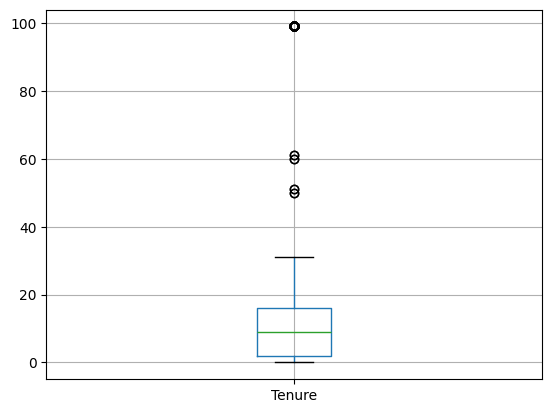

In [285]:
# Generating boxplot for Tenure Feature to check for outliers
plt.clf()
df.boxplot(column='Tenure').plot()
plt.show()

The Maximum Cap Value of tenure feature in the boxplot is :  31 

Displaying the tenure outliers boolean array :

[False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True False  True
  True]

The outliers in the Tenure feature are : 

[99 50 60 51 61]

Replacing all the outliers with median : 

Printing the value counts of Tenure feature after replacing the outliers with  31
Tenure
1     1351
0     1231
9      853
8      519
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
26     122
25     114
29     114
31      96
Name: count, dtype: int64

All the outlier in the Tenure feature are replaced successfully


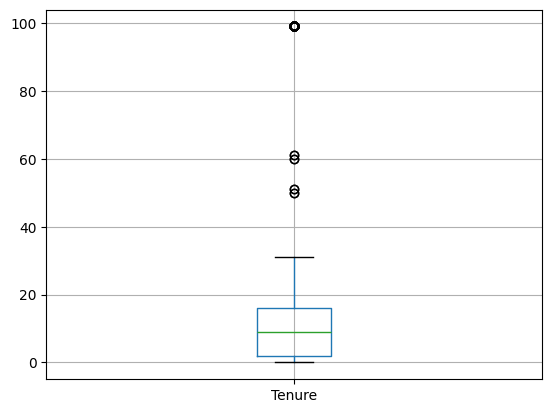

In [286]:
#Computing the max cap value from the boxplot
TenureBoxPlot = df.boxplot(column='Tenure', return_type='dict')
TenureMaxCapValue = TenureBoxPlot['caps'][1].get_ydata()[0]
print('The Maximum Cap Value of tenure feature in the boxplot is : ',TenureMaxCapValue, '\n' )

#Computing the list of outliers
TenureOutlierBoolean = df['Tenure'].unique() > TenureMaxCapValue
print('Displaying the tenure outliers boolean array :\n')
print(TenureOutlierBoolean)
TenureOutliersArr = df['Tenure'].unique()[TenureOutlierBoolean]
print('\nThe outliers in the Tenure feature are : \n')
print(TenureOutliersArr)

#Replacing outliers with maxcap value
print('\nReplacing all the outliers with median : \n')
df['Tenure'].replace(list(TenureOutliersArr), int(df['Tenure'].median()), inplace=True)
print('Printing the value counts of Tenure feature after replacing the outliers with ',TenureMaxCapValue)
print(df['Tenure'].value_counts(dropna=False))
print('\nAll the outlier in the Tenure feature are replaced successfully')


#Deleting all the temporary variables created during outlier detection and treatment
del TenureOutliersArr
del TenureOutlierBoolean
del TenureMaxCapValue
del TenureBoxPlot

<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Observed that there are outliers form the boxplot.</li>
        <li>The outliers are [99 50 60 51 61], and the maxcap value from the box plot is 31.</li>
        <li>Thus replaced all the outliers with 31 successfully.</li>
    </ul>
</p>

## Data Cleaning of City_Tier Feature

### Removing Irrelevant data from City_Tier Feature

In [287]:
# Checking unique values with their frequencies in the City_Tier Feature
print('Printing the value counts of City_Tier feature: \n')
print(df['City_Tier'].value_counts(dropna=False).sort_index())
print('\nValue Counts of City_Tier feature printed successfully')

Printing the value counts of City_Tier feature: 

City_Tier
1.0    7263
2.0     480
3.0    3405
NaN     112
Name: count, dtype: int64

Value Counts of City_Tier feature printed successfully


<b>Analyst Observation : </b>
<p>
    No irrelevant data observed in City_Tier feature. <br>
    Hence no further action on irrelevant data is required.
</p>

### Missing Value analysis and Treatment for City_Tier Feature

In [288]:
#Gathering statistical information on City_Tier feature

print('\nTotal number of null values in City_Tier feature is : ', df['City_Tier'].isna().sum())
print('\nPercentage of null values in City_Tier feature is : ', df['City_Tier'].isna().mean()*100)
print('\nThe mean of City_Tier feature is : ', df['City_Tier'].mean())
print('\nThe median of City_Tier feature is : ', df['City_Tier'].median())
print('\nThe mode City_Tier of feature is : ', df['City_Tier'].mode())
print('\nOther statistical information on City_Tier feature : \n')
df['City_Tier'].describe()


Total number of null values in City_Tier feature is :  112

Percentage of null values in City_Tier feature is :  0.9946714031971581

The mean of City_Tier feature is :  1.653928955866523

The median of City_Tier feature is :  1.0

The mode City_Tier of feature is :  0    1.0
Name: City_Tier, dtype: float64

Other statistical information on City_Tier feature : 



count    11148.000000
mean         1.653929
std          0.915015
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: City_Tier, dtype: float64

In [289]:
#As the City_Tier is a categorical variable. The median and mode are same.
#Thus replacing the City_Tier feature with mode

print('Total number of null values in the City_Tier feature are : ',df['City_Tier'].isna().sum())
print('Replacing the null values in the City_Tier feature with mode\n')
df['City_Tier'].fillna(df['City_Tier'].mode()[0],inplace=True)
print('Null values in City_Tier Feature replaced successfully')
print('\nPrinting the value counts of City_Tier feature after replacin the null values with mode : \n')
print(df['City_Tier'].value_counts(dropna=False).sort_index())
print('\nTotal number of null values in the City_Tier feature after replacing the null values with mode is : ',df['City_Tier'].isna().sum())

Total number of null values in the City_Tier feature are :  112
Replacing the null values in the City_Tier feature with mode

Null values in City_Tier Feature replaced successfully

Printing the value counts of City_Tier feature after replacin the null values with mode : 

City_Tier
1.0    7375
2.0     480
3.0    3405
Name: count, dtype: int64

Total number of null values in the City_Tier feature after replacing the null values with mode is :  0


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>City_Tier is a categorical variable and observed that there are 112 null values</li>
        <li>Null values City_Tier variable are replaced with mode (1.0) </li>
    </ul>
</p>

### Outlier Detection and Treatment for City_Tier Feature

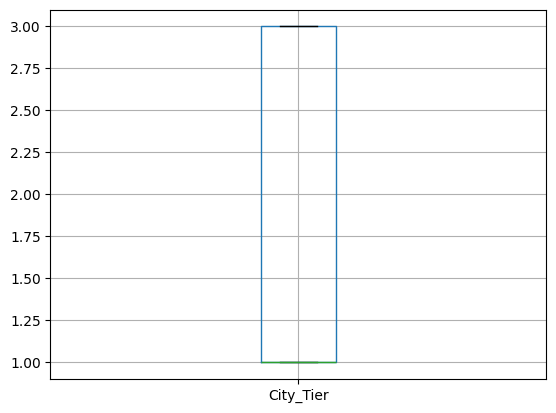

In [290]:
# Generating boxplot for City_Tier Feature to check for outliers
plt.clf()
df.boxplot(column='City_Tier').plot()
plt.show()

<b>Analyst Observation : </b>
<p>
    No outliers observed in the City_Tier feature.<br>
    Hence no outlier treatment is required.
</p>

## Data Cleaning of CC_Contacted_LY Feature

### Removing Irrelevant data from CC_Contacted_LY Feature

In [291]:
# Checking unique values with their frequencies in the CC_Contacted_LY Feature
print('Printing the value counts of CC_Contacted_LY feature: \n')
print(df['CC_Contacted_LY'].value_counts(dropna=False).sort_index())
print('\nValue Counts of CC_Contacted_LY feature printed successfully')

Printing the value counts of CC_Contacted_LY feature: 

CC_Contacted_LY
4.0        1
5.0        8
6.0      311
7.0      391
8.0      538
9.0      655
10.0     489
11.0     524
12.0     571
13.0     655
14.0     682
15.0     623
16.0     663
17.0     525
18.0     374
19.0     364
20.0     319
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
26.0     169
27.0     174
28.0     178
29.0     181
30.0     175
31.0     165
32.0     192
33.0     155
34.0     178
35.0     165
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
41.0      29
42.0      30
43.0       8
126.0      1
127.0      1
129.0      1
132.0      1
NaN      102
Name: count, dtype: int64

Value Counts of CC_Contacted_LY feature printed successfully


<b>Analyst Observation : </b>
<p>
    No irrelevant data observed in CC_Contacted_LY feature.<br>
    Hence no further action required on irrelevant data is required.
</p>

### Missing Value analysis and Treatment for CC_Contacted_LY Feature

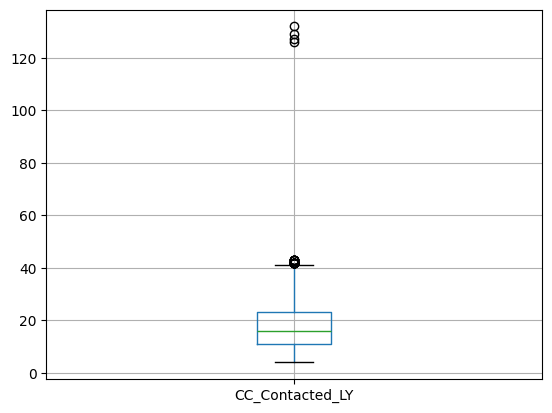

In [292]:
#Generating boxplot and check for outlies in CC_Contacted_LY
plt.clf()
df.boxplot(column='CC_Contacted_LY').plot()
plt.show()

In [293]:
#Gathering statistical information on CC_Contacted_LY feature

print('\nTotal number of null values in CC_Contacted_LY feature is : ', df['CC_Contacted_LY'].isna().sum())
print('\nPercentage of null values in CC_Contacted_LY feature is : ', df['CC_Contacted_LY'].isna().mean()*100)
print('\nThe mean of CC_Contacted_LY feature is : ', df['CC_Contacted_LY'].mean())
print('\nThe median of CC_Contacted_LY feature is : ', df['CC_Contacted_LY'].median())
print('\nThe mode CC_Contacted_LY of feature is : ', df['CC_Contacted_LY'].mode())
print('\nOther statistical information on CC_Contacted_LY feature : \n')
df['CC_Contacted_LY'].describe()


Total number of null values in CC_Contacted_LY feature is :  102

Percentage of null values in CC_Contacted_LY feature is :  0.9058614564831261

The mean of CC_Contacted_LY feature is :  17.867090876501166

The median of CC_Contacted_LY feature is :  16.0

The mode CC_Contacted_LY of feature is :  0    14.0
Name: CC_Contacted_LY, dtype: float64

Other statistical information on CC_Contacted_LY feature : 



count    11158.000000
mean        17.867091
std          8.853269
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64

In [294]:
#Replacing the Missing values with median as CC_Contacted_LY has outliers

print('\nTotal number of missing values in the CC_Contacted_LY feature are : ',df['CC_Contacted_LY'].isna().sum())
print('The Median of the CC_Contacted_LY feature is : ',df['CC_Contacted_LY'].median(),'\n')
print('Replacing the missing values of CC_Contacted_LY with Median ')
df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median(), inplace=True)
print('\nReplaced the missing values of CC_Contacted_LY with median successfully ')
print('Printing the value counts of the CC_Contacted_LY variable to check whether the null values are replace or not : ')
print(df['CC_Contacted_LY'].value_counts(dropna=False).sort_index())
print('\nData type of tenure feature after handling missing value is : ',df['CC_Contacted_LY'].dtype)
print('\nTotal number of null values in CC_Contacted_LY feature after replacing the missing values with median are : ',df['CC_Contacted_LY'].isna().sum())


Total number of missing values in the CC_Contacted_LY feature are :  102
The Median of the CC_Contacted_LY feature is :  16.0 

Replacing the missing values of CC_Contacted_LY with Median 

Replaced the missing values of CC_Contacted_LY with median successfully 
Printing the value counts of the CC_Contacted_LY variable to check whether the null values are replace or not : 
CC_Contacted_LY
4.0        1
5.0        8
6.0      311
7.0      391
8.0      538
9.0      655
10.0     489
11.0     524
12.0     571
13.0     655
14.0     682
15.0     623
16.0     765
17.0     525
18.0     374
19.0     364
20.0     319
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
26.0     169
27.0     174
28.0     178
29.0     181
30.0     175
31.0     165
32.0     192
33.0     155
34.0     178
35.0     165
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
41.0      29
42.0      30
43.0       8
126.0      1
127.0      1
129.0      1
132.0      1
Name: count, dtype: int64

Data typ

<b>Analyst Observation : </b>
<p>
    <ul>
        <li>CC_Contacted_LY is a categorical variable and there are outliers</li>
        <li>Hence the missing values are replaced with median</li>
        <li>After replacing the missing values with median (16.0), the frequency of 16.0 is increased to 765 from 663 and the null values count is decreased to 0 from 102</li>
        <li>Thus all the missing values are replaced with median successfully.</li>
    </ul>
</p>

### Outlier Detection and Treatment for CC_Contacted_LY Feature

The Maximum Cap Value of CC_Contacted_LY feature in the boxplot is :  41.0 

Displaying the CC_Contacted_LY outliers boolean array :

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False  True  True
 False False False False False  True  True  True]

The outliers in the CC_Contacted_LY feature are : 

[126. 127.  42. 132.  43. 129.]

Replacing all the outliers with median 

Printing the value counts of CC_Contacted_LY feature after replacing the outliers with median
CC_Contacted_LY
4.0       1
5.0       8
6.0     311
7.0     391
8.0     538
9.0     655
10.0    489
11.0    524
12.0    571
13.0    655
14.0    682
15.0    623
16.0    807
17.0    525
18.0    374
19.0    364
20.0    319
21.0    310
22.0    282
23.0    241
24.0    214
25.0    197
26.0    169
27.0    174
28.0    178
29.0    181
30.0    175
31.0    165
32.0    192
33.0    155


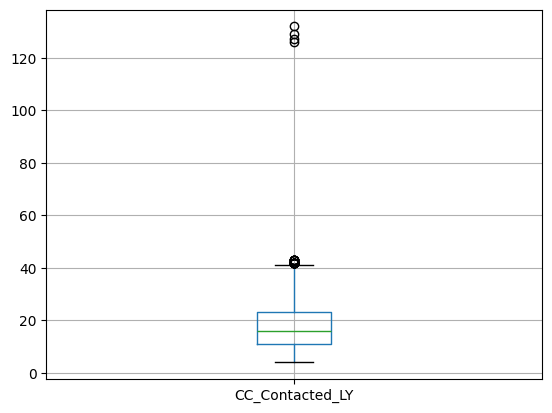

In [295]:
# There are outliers in CC_Contacted_LY and they have to be handled

# Computing the max cap value from the boxplot
BoxPlot = df.boxplot(column='CC_Contacted_LY', return_type='dict')
MaxCapValue = BoxPlot['caps'][1].get_ydata()[0]
print('The Maximum Cap Value of CC_Contacted_LY feature in the boxplot is : ',MaxCapValue, '\n' )

#Computing the list of outliers
OutlierBoolean = df['CC_Contacted_LY'].unique() > MaxCapValue
print('Displaying the CC_Contacted_LY outliers boolean array :\n')
print(OutlierBoolean)
OutliersArr = df['CC_Contacted_LY'].unique()[OutlierBoolean]
print('\nThe outliers in the CC_Contacted_LY feature are : \n')
print(OutliersArr)

#Replacing outliers with maxcap value
print('\nReplacing all the outliers with median \n')
df['CC_Contacted_LY'].replace(list(OutliersArr), df['CC_Contacted_LY'].median(), inplace=True)
print('Printing the value counts of CC_Contacted_LY feature after replacing the outliers with median')
print(df['CC_Contacted_LY'].value_counts(dropna=False).sort_index())
print('\nAll the outlier in the CC_Contacted_LY feature are replaced successfully')


#Deleting all the temporary variables created during outlier detection and treatment
del OutliersArr
del OutlierBoolean
del MaxCapValue
del BoxPlot

<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Boxplot showed that there are outliers. The maxcap value from the box plot is 41</li>
        <li>After replacing the ouliers with 41, the fequency of 41.0 increased to 71</li>
        <li>Thus replaced all the outliers with 41 successfully</li>
    </ul>
</p>

## Data Cleaning of Payment Feature

### Removing Irrelevant data from Payment Feature

In [296]:
# Checking unique values with their frequencies in the Payment Feature
print('Printing the value counts of Payment feature: \n')
print(df['Payment'].value_counts(dropna=False).sort_index())
print('\nValue Counts of Payment feature printed successfully')

Printing the value counts of Payment feature: 

Payment
Cash on Delivery    1014
Credit Card         3511
Debit Card          4587
E wallet            1217
UPI                  822
NaN                  109
Name: count, dtype: int64

Value Counts of Payment feature printed successfully


<b>Analyst Observation : </b>
<p>
    No irrelevant data observed in Payment feature.<br>
    Hence no further action required on irrelevant data is required.
</p>

### Missing Value analysis and Treatment for Payment Feature

In [297]:
# Payment is a categorical variable, hence replacing the missing values with mode

print('Total number of null values in the Payment feature are : ',df['Payment'].isna().sum())
print('The mode of the Payment feature is ',df['Payment'].mode()[0])
print('Replacing the null values in the Payment feature with mode\n')
df['Payment'].fillna(df['Payment'].mode()[0],inplace=True)
print('Null values in Payment Feature replaced successfully')
print('\nPrinting the value counts of Payment feature after replacing the null values with mode : \n')
print(df['Payment'].value_counts(dropna=False).sort_index())
print('\nTotal number of null values in the Payment feature after replacing the null values with mode is : ',df['Payment'].isna().sum())

Total number of null values in the Payment feature are :  109
The mode of the Payment feature is  Debit Card
Replacing the null values in the Payment feature with mode

Null values in Payment Feature replaced successfully

Printing the value counts of Payment feature after replacing the null values with mode : 

Payment
Cash on Delivery    1014
Credit Card         3511
Debit Card          4696
E wallet            1217
UPI                  822
Name: count, dtype: int64

Total number of null values in the Payment feature after replacing the null values with mode is :  0


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Payment is a categorical variable and hence the missing values are replaced with mode</li>
        <li>After replacing the null values with mode the frequency of Debit Card has increased to 4696 for 4587. Also the frequency of null values in the payment featured are reduced to zero</li>
        <li>Thus all missig values in the payment feature replaced with mode successfully</li>
    </ul>
</p>

### Outlier Detection and Treatment for Payment Feature

<b>Analyst Observation : </b>
<p>
    No outlier detection and treatment is required for Payment feature.
</p>

## Data Cleaning of Gender Feature

### Removing Irrelevant data from Gender Feature

In [298]:
# Checking unique values with their frequencies in the Gender Feature
print('Printing the value counts of Gender feature: \n')
print(df['Gender'].value_counts(dropna=False))
print('\nValue Counts of Gender feature printed successfully')

Printing the value counts of Gender feature: 

Gender
Male      6328
Female    4178
M          376
F          270
NaN        108
Name: count, dtype: int64

Value Counts of Gender feature printed successfully


In [299]:
# Replacing F with Female and M with Male values. 

print('Replacing F with Female and M with Male values : \n')
df['Gender'].replace('M','Male',inplace=True)
df['Gender'].replace('F','Female',inplace=True)
print('Replaced F with Female and M with Male successfully : \n')
print(df['Gender'].value_counts(dropna=False).sort_index())

Replacing F with Female and M with Male values : 

Replaced F with Female and M with Male successfully : 

Gender
Female    4448
Male      6704
NaN        108
Name: count, dtype: int64


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Observed that there are few entries with F and few entries with Female.</li>
        <li>Observed that there are few entries with M and few entries with Male.</li>
        <li>As both F and Female conveys the same information and M and Male conveys the same information, F is replaced with Female and M is replaced with Male</li>
        <li>Now the feature Gender feature has only Male and Female entries.</li>
        <li>Thus irrelevant data is handled.</li>
    </ul>
</p>

### Missing Value analysis and Treatment for Gender Feature

In [300]:
# Gender is a categorical variable, hence replacing the missing values with mode

print('Total number of null values in the Gender feature are : ',df['Gender'].isna().sum())
print('The mode of the Gender feature is ',df['Gender'].mode()[0])
print('Replacing the null values in the Gender with mode\n')
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
print('Null values in Gender Feature replaced successfully')
print('\nPrinting the value counts of Gender feature after replacing the null values with mode : \n')
print(df['Gender'].value_counts(dropna=False).sort_index())
print('\nTotal number of null values in the Gender feature after replacing the null values with mode is : ',df['Gender'].isna().sum())

Total number of null values in the Gender feature are :  108
The mode of the Gender feature is  Male
Replacing the null values in the Gender with mode

Null values in Gender Feature replaced successfully

Printing the value counts of Gender feature after replacing the null values with mode : 

Gender
Female    4448
Male      6812
Name: count, dtype: int64

Total number of null values in the Gender feature after replacing the null values with mode is :  0


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Gender is a categorical variable and hence the missing values are replaced with Mode</li>
        <li>The mode of the the Gender feature is 'Male'</li>
        <li>After replacing the missing values with Mode in Gender feature, the frequence of 'Male' is increased from 6704 to 6812. Also the null values frequency decreased to zero.</li>
        <li>Thus all the missing values are replaced with Mode in the Gender Feature.</li>
    </ul> 
</p>

### Outlier Detection and Treatment for Gender Feature

<b>Analyst Observation : </b>
<p>
    No outlier detection and treatment is required for Gender feature.
</p>

## Data Cleaning of Service_Score Feature

### Removing Irrelevant data from Service_Score Feature

In [301]:
# Checking unique values with their frequencies in the Service_Score Feature
print('Printing the value counts of Service_Score feature: \n')
print(df['Service_Score'].value_counts(dropna=False).sort_index())
print('\nValue Counts of Service_Score feature printed successfully')

Printing the value counts of Service_Score feature: 

Service_Score
0.0       8
1.0      77
2.0    3251
3.0    5490
4.0    2331
5.0       5
NaN      98
Name: count, dtype: int64

Value Counts of Service_Score feature printed successfully


<b>Analyst Observation : </b>
<p>
    No irrelevant data observed in Service_Score feature.<br>
    Hence no further action required on irrelevant data is required.
</p>

### Missing Value analysis and Treatment for Service_Score Feature

In [302]:
#Gathering statistical information on Service_Score feature

print('\nTotal number of null values in Service_Score feature is : ', df['Service_Score'].isna().sum())
print('\nPercentage of null values in Service_Score feature is : ', df['Service_Score'].isna().mean()*100)
print('\nThe mean of Service_Score feature is : ', df['Service_Score'].mean())
print('\nThe median of Service_Score feature is : ', df['Service_Score'].median())
print('\nThe mode of Service_Score feature is : ', df['Service_Score'].mode())
print('\nOther statistical information on Service_Score feature : \n')
df['Service_Score'].describe()


Total number of null values in Service_Score feature is :  98

Percentage of null values in Service_Score feature is :  0.8703374777975134

The mean of Service_Score feature is :  2.9025264289553845

The median of Service_Score feature is :  3.0

The mode of Service_Score feature is :  0    3.0
Name: Service_Score, dtype: float64

Other statistical information on Service_Score feature : 



count    11162.000000
mean         2.902526
std          0.725584
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Service_Score, dtype: float64

In [303]:
# The Service_Score is a categorical variable and both the median and mode are same. 
# Hence either median or mode can be used to replace the missing values

print('Total number of null values in the Service_Score feature are : ',df['Service_Score'].isna().sum())
print('The mode of the Service_Score feature is ',df['Service_Score'].mode()[0])
print('Replacing the null values in the Service_Score with mode\n')
df['Service_Score'].fillna(df['Service_Score'].mode()[0],inplace=True)
print('Null values in Service_Score Feature replaced successfully')
print('\nPrinting the value counts of Service_Score feature after replacing the null values with mode : \n')
print(df['Service_Score'].value_counts(dropna=False).sort_index())
print('\nTotal number of null values in the Service_Score feature after replacing the null values with mode is : ',df['Gender'].isna().sum())

Total number of null values in the Service_Score feature are :  98
The mode of the Service_Score feature is  3.0
Replacing the null values in the Service_Score with mode

Null values in Service_Score Feature replaced successfully

Printing the value counts of Service_Score feature after replacing the null values with mode : 

Service_Score
0.0       8
1.0      77
2.0    3251
3.0    5588
4.0    2331
5.0       5
Name: count, dtype: int64

Total number of null values in the Service_Score feature after replacing the null values with mode is :  0


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>198 null values observed in Service_Score feature. Replaced the null values with mode.</li>
        <li>Mode of Service Score is 3.0</li>
        <li>After replacing the null values with mode the frequency of 3.0 is increased from 5490 to 5588, and the null values frequency decreased to zero.</li>
        <li>Thus all then null values in the Service_Score are replaced with mode successfully.</li>
    </ul>
</p>

### Outlier Detection and Treatment for Service_Score Feature

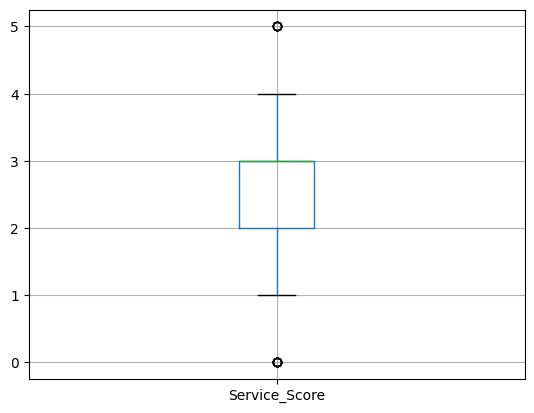

In [304]:
plt.clf()
df.boxplot(column='Service_Score').plot()
plt.show()

In [305]:
# As per the box plot there are outliers in the Service_Score Feature
# The outlier below the lower cap is 0 
# The outlier above the upper cap is 5
# Hence replacing 0 with 1 and 5 with 4

print('Replacing 0.0 with 3.0 in in Service_Score Feature')
df['Service_Score'].replace(0.0, 3.0, inplace=True)
print('Replacing 5.0 with 3.0 in in Service_Score Feature')
df['Service_Score'].replace(5.0, 3.0, inplace=True)
print(df['Service_Score'].value_counts(dropna=False))


Replacing 0.0 with 3.0 in in Service_Score Feature
Replacing 5.0 with 3.0 in in Service_Score Feature
Service_Score
3.0    5601
2.0    3251
4.0    2331
1.0      77
Name: count, dtype: int64


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Observed few outliers above the upper cap and few outliers below the lower cap</li>
        <li>0.0 is an outlier below the lower cap which is 1.0. Hence replaced 0.0 with 3.0</li>
        <li>5.0 is an outlier above the upper capt which is 5.0. Hence replaced 5.0 with 3.0</li>
        <li>Thus outlier treatment performed successfully on Service_Score feature</li>
    </ul>
</p>

## Data Cleaning of Account_user_count Feature

### Removing Irrelevant data from Account_user_count Feature

In [306]:
# Checking unique values with their frequencies in the Account_user_count Feature
print('Printing the value counts of Account_user_count feature: \n')
print(df['Account_user_count'].value_counts(dropna=False))
print('\nValue Counts of Account_user_count feature printed successfully')

Printing the value counts of Account_user_count feature: 

Account_user_count
4      4569
3      3261
5      1699
2       526
1       446
@       332
6       315
NaN     112
Name: count, dtype: int64

Value Counts of Account_user_count feature printed successfully


In [307]:
# Replacing @ with None
df['Account_user_count'].replace('@',None,inplace=True)
print('Printing value_counts for Account_user_count after removing @ : \n')
print(df['Account_user_count'].value_counts(dropna=False))
print('\nTotal number of null values after replacing @ with None is : ',df['Account_user_count'].isna().sum())

Printing value_counts for Account_user_count after removing @ : 

Account_user_count
4       4569
3       3261
5       1699
2        526
1        446
None     332
6        315
NaN      112
Name: count, dtype: int64

Total number of null values after replacing @ with None is :  444


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Observed that there is an irrlevant data that is '@'</li>
        <li>Thus irrelevant data is handled by replacing '@' with None</li>
    </ul>
</p>

### Missing Value analysis and Treatment for Account_user_count Feature

In [308]:
#Gathering statistical information on Account_user_count feature

print('\nTotal number of null values in Account_user_count feature is : ', df['Account_user_count'].isna().sum())
print('\nPercentage of null values in Account_user_count feature is : ', df['Account_user_count'].isna().mean()*100)
print('\nThe mean of Account_user_count feature is : ', df['Account_user_count'].mean())
print('\nThe median of Account_user_count feature is : ', df['Account_user_count'].median())
print('\nThe mode of Account_user_count feature is : ', df['Account_user_count'].mode())
print('\nOther statistical information on Account_user_count feature : \n')
df['Account_user_count'].describe()


Total number of null values in Account_user_count feature is :  444

Percentage of null values in Account_user_count feature is :  3.9431616341030193

The mean of Account_user_count feature is :  3.6928624260355027

The median of Account_user_count feature is :  4.0

The mode of Account_user_count feature is :  0    4
Name: Account_user_count, dtype: object

Other statistical information on Account_user_count feature : 



count     10816
unique        6
top           4
freq       4569
Name: Account_user_count, dtype: int64

In [309]:
# Account_user_count is a discrete continuous variable and also noticed that both median and mode are same.
# Hence replacing the missing values with Mode

print('Total number of null values in the Account_user_count feature are : ',df['Account_user_count'].isna().sum())
print('The mode of the Account_user_count feature is ',df['Account_user_count'].mode()[0])
print('Replacing the null values in the Account_user_count with mode\n')
df['Account_user_count'].fillna(df['Account_user_count'].mode()[0],inplace=True)
print('Null values in Account_user_count Feature replaced successfully')
print('\nPrinting the value counts of Account_user_count feature after replacing the null values with mode : \n')
print(df['Account_user_count'].value_counts(dropna=False).sort_index())
print('\nTotal number of null values in the Gender feature after replacing the null values with mode is : ',df['Account_user_count'].isna().sum())

Total number of null values in the Account_user_count feature are :  444
The mode of the Account_user_count feature is  4
Replacing the null values in the Account_user_count with mode

Null values in Account_user_count Feature replaced successfully

Printing the value counts of Account_user_count feature after replacing the null values with mode : 

Account_user_count
1     446
2     526
3    3261
4    5013
5    1699
6     315
Name: count, dtype: int64

Total number of null values in the Gender feature after replacing the null values with mode is :  0


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>444 Null values observed in Account_user_count feature. All the null values are replaced with Mode</li>
        <li>Mode of Account_user_count is 4</li>
        <li>After replacing the null values in Account_user_count with mode, the frequency of 4.0 is increased to 5013 from 4569. Also the null value frequency is reduced to zero.</li>
        <li>Thus all the null values are replaced with Mode successfully</li>
    </ul>
</p>

### Outlier Detection and Treatment for Account_user_count Feature

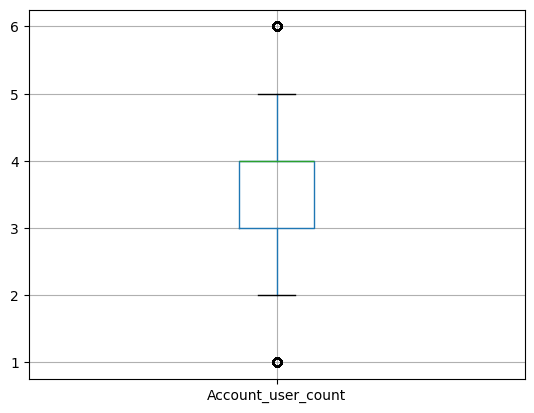

In [310]:
plt.clf()
df.boxplot(column='Account_user_count').plot()
plt.show()

In [311]:
# As per the box plot there are outliers in the Account_user_count Feature
# The outlier below the lower cap is 1 
# The outlier above the upper cap is 6
# Hence replacing 1 with 2 and 6 with 5

print('Replacing 1 with 4 in in Account_user_count Feature')
df['Account_user_count'].replace(1, 4, inplace=True)
print('Replacing 6 with 4 in in Account_user_count Feature')
df['Account_user_count'].replace(6, 4, inplace=True)
print(df['Account_user_count'].value_counts(dropna=False))

Replacing 1 with 4 in in Account_user_count Feature
Replacing 6 with 4 in in Account_user_count Feature
Account_user_count
4    5774
3    3261
5    1699
2     526
Name: count, dtype: int64


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Observed few outliers above the upper cap and few outliers below the lower cap</li>
        <li>1 is an outlier below the lower cap which is 2. Hence replaced 1 with 4</li>
        <li>6 is an outlier above the upper cap which is 5. Hence replaced 6 with 4</li>
        <li>Thus outlier treatment performed successfully on Account_user_count feature</li>
    </ul>
</p>

## Data Cleaning of account_segment Feature

### Removing Irrelevant data from account_segment Feature

In [312]:
# Checking unique values with their frequencies in the account_segment Feature
print('Printing the value counts of account_segment feature: \n')
print(df['account_segment'].value_counts(dropna=False))
print('\nValue Counts of account_segment feature printed successfully')

Printing the value counts of account_segment feature: 

account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
NaN               97
Super +           47
Name: count, dtype: int64

Value Counts of account_segment feature printed successfully


In [313]:
#Replacing 'Super +' with 'Super Plus'
print("Replacing 'Super +' with 'Super Plus' : \n")
df['account_segment'].replace('Super +', 'Super Plus', inplace=True)
print(df['account_segment'].value_counts(dropna = False))
print("\nReplaced 'Super +' with 'Super Plus' successfully :")

#Replacing 'Regular +' with 'Regular Plus'
print("Replacing 'Regular +' with 'Regular Plus' : \n")
df['account_segment'].replace('Regular +','Regular Plus',inplace=True)
print(df['account_segment'].value_counts(dropna = False))
print("\n Replaced 'Regular +' with 'Regular Plus' successfully :")

Replacing 'Super +' with 'Super Plus' : 

account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       818
Regular          520
Regular +        262
NaN               97
Name: count, dtype: int64

Replaced 'Super +' with 'Super Plus' successfully :
Replacing 'Regular +' with 'Regular Plus' : 

account_segment
Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
NaN               97
Name: count, dtype: int64

 Replaced 'Regular +' with 'Regular Plus' successfully :


<b>Analyst Observation : </b>
<p>
    <ol>
        <li>Observed that 'Super +' and 'Super Plus' conveys the same information. Hence repalced 'Super +' with 'Super Plus'</li>
        <li>Observed that 'Regular +' and 'Regular Plus' conveys the same information. Hence repalced 'Regular +' with 'Regular Plus'</li>
        <li>Thus irrelevant data in the account_segment feature is handled</li>
    </ol>
</p>

### Missing Value analysis and Treatment for account_segment Feature

In [314]:
# account_segment is a categorical variable. Hence replacing the missing values with Mode
print('Total number of null values in the account_segment feature are : ',df['account_segment'].isna().sum())
print('The mode of the account_segment feature is ',df['account_segment'].mode()[0])
print('Replacing the null values in the account_segment with mode\n')
df['account_segment'].fillna(df['account_segment'].mode()[0],inplace=True)
print('Null values in account_segment Feature replaced successfully')
print('\nPrinting the value counts of account_segment feature after replacing the null values with mode : \n')
print(df['account_segment'].value_counts(dropna=False).sort_index())
print('\nTotal number of null values in the account_segment feature after replacing the null values with mode is : ',df['account_segment'].isna().sum())

Total number of null values in the account_segment feature are :  97
The mode of the account_segment feature is  Regular Plus
Replacing the null values in the account_segment with mode

Null values in account_segment Feature replaced successfully

Printing the value counts of account_segment feature after replacing the null values with mode : 

account_segment
HNI             1639
Regular          520
Regular Plus    4221
Super           4062
Super Plus       818
Name: count, dtype: int64

Total number of null values in the account_segment feature after replacing the null values with mode is :  0


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>97 null values observed in the account_segment feature and the mode is Regular Plus.</li>
        <li>Hence replaced null values with mode</li>
        <li>After replacing null values with mode, the frequency of Regular plus is increased to 4221 from 4124. Also the null values frequency is reduced to zero.</li>
        <li>Thus all the null values are replaced with mode successfully.</li>
    </ul>
</p>

### Outlier Detection and Treatment for account_segment Feature

<b>Analyst Observation : </b>
<p>
    No outlier detection and treatment is required for account_segment feature
</p>

## Data Cleaning of CC_Agent_Score Feature

### Removing Irrelevant data from CC_Agent_Score Feature

In [315]:
# Checking unique values with their frequencies in the CC_Agent_Score Feature
print('Printing the value counts of CC_Agent_Score feature: \n')
print(df['CC_Agent_Score'].value_counts(dropna=False))
print('\nValue Counts of CC_Agent_Score feature printed successfully')

Printing the value counts of CC_Agent_Score feature: 

CC_Agent_Score
3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
NaN     116
Name: count, dtype: int64

Value Counts of CC_Agent_Score feature printed successfully


<b>Analyst Observation : </b>
<p>
    No irrelevant data observed in CC_Agent_Score feature.<br>
    Hence no further action required on irrelevant data is required.
</p>

### Missing Value analysis and Treatment for CC_Agent_Score Feature

In [316]:
# CC_Agent_Score is an ordinal categorical variable. 
# Thus replacing the null values with mode

print('Total number of null values in the CC_Agent_Score feature are : ',df['CC_Agent_Score'].isna().sum())
print('The mode of the CC_Agent_Score feature is ',df['CC_Agent_Score'].mode()[0])
print('Replacing the null values in the CC_Agent_Score with mode\n')
df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0],inplace=True)
print('Null values in CC_Agent_Score Feature replaced successfully')
print('\nPrinting the value counts of CC_Agent_Score feature after replacing the null values with mode : \n')
print(df['CC_Agent_Score'].value_counts(dropna=False).sort_index())
print('\nTotal number of null values in the CC_Agent_Score feature after replacing the null values with mode is : ',df['CC_Agent_Score'].isna().sum())

Total number of null values in the CC_Agent_Score feature are :  116
The mode of the CC_Agent_Score feature is  3.0
Replacing the null values in the CC_Agent_Score with mode

Null values in CC_Agent_Score Feature replaced successfully

Printing the value counts of CC_Agent_Score feature after replacing the null values with mode : 

CC_Agent_Score
1.0    2302
2.0    1164
3.0    3476
4.0    2127
5.0    2191
Name: count, dtype: int64

Total number of null values in the CC_Agent_Score feature after replacing the null values with mode is :  0


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>116 null values observed in CC_Agent_Score feature. Replaced the null values with mode.</li>
        <li>Mode of CC_Agent_Score is 3.0</li>
        <li>After replacing the null values with mode the frequency of 3.0 is increased from 5490 to 3476, and the null values frequency decreased to zero.</li>
        <li>Thus all the null values are replaced with mode</li>
    </ul>
</p>

### Outlier Detection and Treatment for CC_Agent_Score Feature

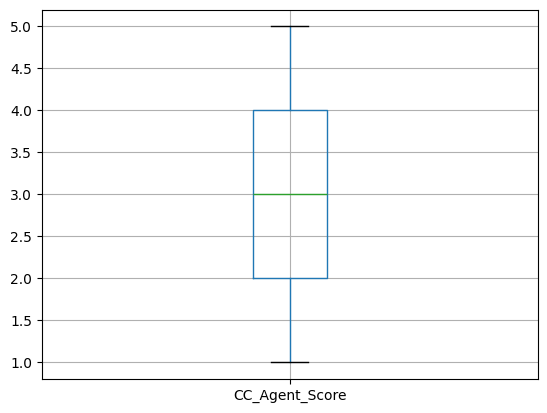

In [317]:
plt.clf()
df.boxplot(column='CC_Agent_Score').plot()
plt.show()

<b>Analyst Observation : </b>
<p>
    No outlier treatment is required for CC_Agent_Score feature.
</p>

## Data Cleaning of Marital_Status Feature

### Removing Irrelevant data from Marital_Status Feature

In [318]:
# Checking unique values with their frequencies in the Marital_Status Feature
print('Printing the value counts of Marital_Status feature: \n')
print(df['Marital_Status'].value_counts(dropna=False))
print('\nValue Counts of Marital_Status feature printed successfully')

Printing the value counts of Marital_Status feature: 

Marital_Status
Married     5860
Single      3520
Divorced    1668
NaN          212
Name: count, dtype: int64

Value Counts of Marital_Status feature printed successfully


<b>Analyst Observation : </b>
<p>
    No irrelevant data observed in Marital_Status feature.<br>
    Hence no further action required on irrelevant data is required.
</p>

### Missing Value analysis and Treatment for Marital_Status Feature

In [319]:
# Marital_Status is a categorical variable. Hence replacing the null values with mode

print('Total number of null values in the Marital_Status feature are : ',df['Marital_Status'].isna().sum())
print('The mode of the Marital_Status feature is ',df['Marital_Status'].mode()[0])
print('Replacing the null values in the Marital_Status with mode\n')
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0],inplace=True)
print('Null values in Marital_Status Feature replaced successfully')
print('\nPrinting the value counts of Marital_Status feature after replacing the null values with mode : \n')
print(df['Marital_Status'].value_counts(dropna=False).sort_index())
print('\nTotal number of null values in the Marital_Status feature after replacing the null values with mode is : ',df['Marital_Status'].isna().sum())

Total number of null values in the Marital_Status feature are :  212
The mode of the Marital_Status feature is  Married
Replacing the null values in the Marital_Status with mode

Null values in Marital_Status Feature replaced successfully

Printing the value counts of Marital_Status feature after replacing the null values with mode : 

Marital_Status
Divorced    1668
Married     6072
Single      3520
Name: count, dtype: int64

Total number of null values in the Marital_Status feature after replacing the null values with mode is :  0


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>212 null values observed in Marital_Status feature. Replaced the null values with mode.</li>
        <li>Mode of Service Score is 'Married'</li>
        <li>After replacing the null values with mode the frequency of 'Married' is increased from 5860 to 6072, and the null values frequency decreased to zero.</li>
        <li>Thus all the null values are replaced with mode in Marital_Status feature successfully</li>
    </ul>
</p>

### Outlier Detection and Treatment for Marital_Status Feature

<b>Analyst Observation : </b>
<p>
    No outlier treatment is required for Martial_Status feature.
</p>

## Data Cleaning of rev_per_month Feature

### Removing Irrelevant data from rev_per_month Feature

In [320]:
# Checking unique values with their frequencies in the rev_per_month Feature
print('Printing the value counts of rev_per_month feature: \n')
print(df['rev_per_month'].value_counts(dropna=False))
print('\nValue Counts of rev_per_month feature printed successfully')

Printing the value counts of rev_per_month feature: 

rev_per_month
3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
NaN     102
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: count, dtype: int64

Value Counts of rev_per_month feature printed successfully


In [321]:
# Replacing '+' with None
print("Replacing '+' with None : \n")
df['rev_per_month'].replace('+',np.NaN,inplace=True)
print("\nReplaced '+' with None successfully : ")
print("\nPrinting the value counts of rev_per_month feature after replacing '+' with None: \n")
print(df['rev_per_month'].value_counts(dropna = False))
print("\nTotal number of null values after replacing '+' with None : ",df['rev_per_month'].isna().sum())

Replacing '+' with None : 


Replaced '+' with None successfully : 

Printing the value counts of rev_per_month feature after replacing '+' with None: 

rev_per_month
3.0      1746
2.0      1585
5.0      1337
4.0      1218
6.0      1085
NaN       791
7.0       754
8.0       643
9.0       564
10.0      413
1.0       402
11.0      278
12.0      166
13.0       93
14.0       48
15.0       24
102.0       8
123.0       5
124.0       5
107.0       5
136.0       4
140.0       4
118.0       4
133.0       4
129.0       4
115.0       3
117.0       3
138.0       3
101.0       3
110.0       3
137.0       3
119.0       3
108.0       3
127.0       3
116.0       3
126.0       3
130.0       3
113.0       3
120.0       2
19.0        2
131.0       2
139.0       2
114.0       2
125.0       2
22.0        2
121.0       2
105.0       2
134.0       2
20.0        1
23.0        1
122.0       1
21.0        1
104.0       1
25.0        1
135.0       1
111.0       1
109.0       1
100.0       1
103.0       1
Name: c

<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Observed that there is an irrelevant value '+' in the rev_per_month feature. Hence replaced the irrelevant value '+' with None</li>
        <li>Thus irrelevant data is handled in rev_per_month feature</li>
    </ul>
</p>

### Missing Value analysis and Treatment for rev_per_month Feature

In [322]:
#Gathering statistical information on rev_per_month feature

print('\nTotal number of null values in rev_per_month feature is : ', df['rev_per_month'].isna().sum())
print('\nPercentage of null values in rev_per_month feature is : ', df['rev_per_month'].isna().mean()*100)
print('\nThe mean of rev_per_month feature is : ', df['rev_per_month'].mean())
print('\nThe median of rev_per_month feature is : ', df['rev_per_month'].median())
print('\nThe mode of rev_per_month feature is : ', df['rev_per_month'].mode())
print('\nOther statistical information on rev_per_month feature : \n')
df['rev_per_month'].describe()


Total number of null values in rev_per_month feature is :  791

Percentage of null values in rev_per_month feature is :  7.024866785079929

The mean of rev_per_month feature is :  6.362594326105645

The median of rev_per_month feature is :  5.0

The mode of rev_per_month feature is :  0    3.0
Name: rev_per_month, dtype: float64

Other statistical information on rev_per_month feature : 



count    10469.000000
mean         6.362594
std         11.909686
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64

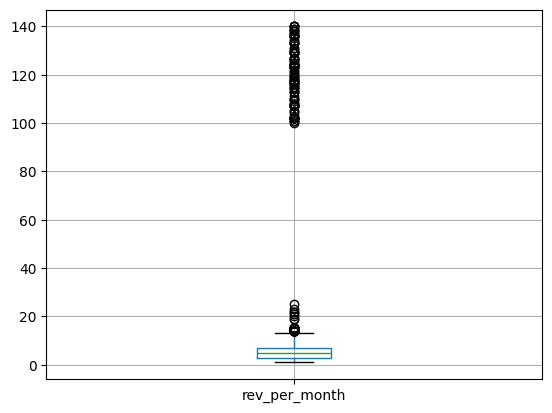

In [323]:
plt.clf()
df.boxplot(column='rev_per_month').plot()
plt.show()

In [324]:
# rev_per_month is a continuous descrete varaible. Also observed that there are outliers.
# Hence it is recommanded to replace the null values with median

print('The total number of null values in rev_per_month feature is : ',df['rev_per_month'].isna().sum())
print('The Median of the rev_per_month feature is : ',int(df['rev_per_month'].median()),'\n')
print('Replacing the null values with median in rev_per_month feature :\n')
df['rev_per_month'].fillna(int(df['rev_per_month'].median()),inplace=True)
print('\nReplaced the null values with median in rev_per_month feature successfully :\n')
print('Printing the value counts of the rev_per_month variable to check whether the null values are replace or not : ')
print(df['rev_per_month'].value_counts(dropna=False).sort_index())
print('The total number of null values in rev_per_month feature after replacing with median: ',df['rev_per_month'].isna().sum())
print('Data type of tenure feature after handling missing value is : ',df['rev_per_month'].dtype)

The total number of null values in rev_per_month feature is :  791
The Median of the rev_per_month feature is :  5 

Replacing the null values with median in rev_per_month feature :


Replaced the null values with median in rev_per_month feature successfully :

Printing the value counts of the rev_per_month variable to check whether the null values are replace or not : 
rev_per_month
1.0       402
2.0      1585
3.0      1746
4.0      1218
5.0      2128
6.0      1085
7.0       754
8.0       643
9.0       564
10.0      413
11.0      278
12.0      166
13.0       93
14.0       48
15.0       24
19.0        2
20.0        1
21.0        1
22.0        2
23.0        1
25.0        1
100.0       1
101.0       3
102.0       8
103.0       1
104.0       1
105.0       2
107.0       5
108.0       3
109.0       1
110.0       3
111.0       1
113.0       3
114.0       2
115.0       3
116.0       3
117.0       3
118.0       4
119.0       3
120.0       2
121.0       2
122.0       1
123.0       5
124.0      

<b>Analyst Observation : </b>
<p>
</p>

### Outlier Detection and Treatment for rev_per_month Feature

The Maximum Cap Value of rev_per_month feature in the boxplot is :  13.0 

Displaying the rev_per_month Max Cap outliers boolean array :

[False False False False False False False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True]

The Max cap outliers in the rev_per_month feature are : 

[130.  19. 139. 102. 120. 138. 127. 123. 124. 116.  21. 126. 134. 113.
 114. 108. 140. 133. 129. 107. 118. 105.  20. 119. 121. 137. 110.  22.
 101. 136. 125.  14. 115.  23. 122. 117. 131. 104.  15.  25. 135. 111.
 109. 100. 103.]

Replacing all the outliers with median : 

Printing the value counts of rev_per_month feature after replacing the outliers with  13.0
rev_per_month
1.0      402
2.0     1585
3.0     1746
4.0     1218
5.0     2313
6.0  

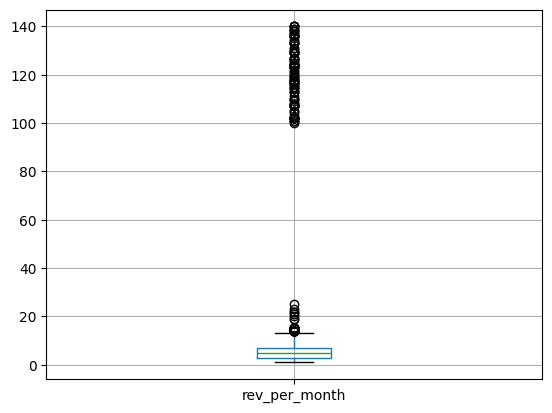

In [325]:
# As per boxplot there are outliers in the rev_per_month feature which needs to be handled. 
# Few outliers are observed above the upper cap 
# In this section the outliers above the upper cap with upper cap

# Computing the max cap value from the boxplot
BoxPlot = df.boxplot(column='rev_per_month', return_type='dict')
MaxCapValue = BoxPlot['caps'][1].get_ydata()[0]
print('The Maximum Cap Value of rev_per_month feature in the boxplot is : ',MaxCapValue, '\n' )

#Computing the list of outliers above the maxcap
OutlierBoolean = df['rev_per_month'].unique() > MaxCapValue
print('Displaying the rev_per_month Max Cap outliers boolean array :\n')
print(OutlierBoolean)
OutliersArr = df['rev_per_month'].unique()[OutlierBoolean]
print('\nThe Max cap outliers in the rev_per_month feature are : \n')
print(OutliersArr)

#Replacing outliers with maxcap value
print('\nReplacing all the outliers with median : \n')
df['rev_per_month'].replace(list(OutliersArr), int(df['rev_per_month'].median()), inplace=True)
print('Printing the value counts of rev_per_month feature after replacing the outliers with ',MaxCapValue)
print(df['rev_per_month'].value_counts(dropna=False).sort_index())
print('\nAll the outlier in the rev_per_month feature are replaced successfully')

#Deleting all the temporary variables created during outlier detection and treatment
del OutliersArr
del OutlierBoolean
del MaxCapValue
del BoxPlot

<b>Analyst Observation : </b>
<p>
</p>

## Data Cleaning of Complain_ly Feature

### Removing Irrelevant data from Complain_ly Feature

In [326]:
# Checking unique values with their frequencies in the Complain_ly Feature
print('Printing the value counts of Complain_ly feature: \n')
print(df['Complain_ly'].value_counts(dropna=False))
print('\nValue Counts of Complain_ly feature printed successfully')

Printing the value counts of Complain_ly feature: 

Complain_ly
0.0    7792
1.0    3111
NaN     357
Name: count, dtype: int64

Value Counts of Complain_ly feature printed successfully


<b>Analyst Observation : </b>
<p>
    No irrelevant data observed in Complain_ly feature.<br>
    Hence no further action required on irrelevant data is required.
</p>

### Missing Value analysis and Treatment for Complain_ly Feature

In [327]:
# Complain_ly is a binary variable. Hence replacing the missing values with mode

print('The mode of Complain_ly feature is : ',df['Complain_ly'].mode())

print('Replacing the null values in Complain_ly feature with mode : \n')
df['Complain_ly'].fillna(df['Complain_ly'].mode()[0], inplace=True)
print('\nAll the null values in the Complain_ly are replaced successfully with mode :')

print('\nPrinting the value counts of the Complain_ly variable to check whether the null values are replace or not : \n')
print(df['Complain_ly'].value_counts(dropna=False).sort_index())

print('\nThe total number of null values in Complain_ly feature after replacing with median : ',df['Complain_ly'].isna().sum())
print('\nData type of Complain_ly feature after handling missing value is : ',df['Complain_ly'].dtype)

The mode of Complain_ly feature is :  0    0.0
Name: Complain_ly, dtype: float64
Replacing the null values in Complain_ly feature with mode : 


All the null values in the Complain_ly are replaced successfully with mode :

Printing the value counts of the Complain_ly variable to check whether the null values are replace or not : 

Complain_ly
0.0    8149
1.0    3111
Name: count, dtype: int64

The total number of null values in Complain_ly feature after replacing with median :  0

Data type of Complain_ly feature after handling missing value is :  float64


<b>Analyst Observation : </b>
<p>
</p>

### Outlier Detection and Treatment for Complain_ly Feature

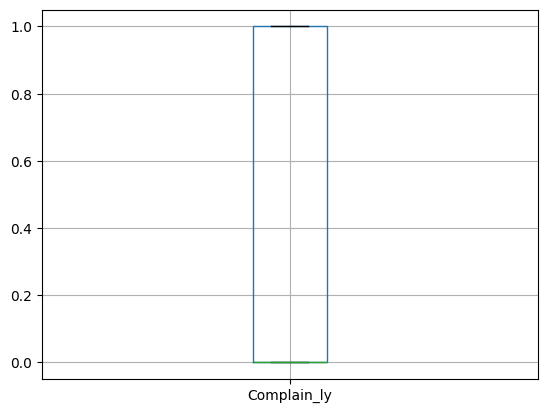

In [328]:
plt.clf()
df.boxplot(column='Complain_ly').plot()
plt.show()

<b>Analyst Observation : </b>
<p>
    No outlier treatment is required for Complain_ly feature.
</p>

## Data Cleaning of rev_growth_yoy Feature

### Removing Irrelevant data from rev_growth_yoy Feature

In [329]:
# Checking unique values with their frequencies in the rev_growth_yoy Feature
print('Printing the value counts of rev_growth_yoy feature: \n')
print(df['rev_growth_yoy'].value_counts(dropna=False))
print('\nValue Counts of rev_growth_yoy feature printed successfully')

Printing the value counts of rev_growth_yoy feature: 

rev_growth_yoy
14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: count, dtype: int64

Value Counts of rev_growth_yoy feature printed successfully


In [330]:
#Replacing '$' with None

print("\nTotal number of Null values before replacing '$' with None : ", df['rev_growth_yoy'].isna().sum())
print("Replacing '$' with None in rev_growth_yoy feature : \n")
df['rev_growth_yoy'].replace('$',None,inplace=True)
print("\nPrinting the value counts of rev_growth_yoy feature after replacing '$' with None: \n")
print(df['rev_growth_yoy'].value_counts(dropna=False))
print("\nTotal number of Null values after replacing '$' with None : ", df['rev_growth_yoy'].isna().sum())



Total number of Null values before replacing '$' with None :  0
Replacing '$' with None in rev_growth_yoy feature : 


Printing the value counts of rev_growth_yoy feature after replacing '$' with None: 

rev_growth_yoy
14      1524
13      1427
15      1283
12      1210
16       949
18       708
17       704
19       619
20       562
11       523
21       433
22       403
23       345
24       229
25       188
26        98
27        35
28        14
None       3
4          3
Name: count, dtype: int64

Total number of Null values after replacing '$' with None :  3


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Observed that there is an irrelevant data '$' in the rev_growth_yoy feature. Hence replaced the irrelevant value with None.</li>
        <li>Thus irrelevant data is handled in the rev_growth_yoy feature</li>
    </ul>
</p>

### Missing Value analysis and Treatment for rev_growth_yoy Feature

In [331]:
#Gathering statistical information on rev_growth_yoy feature

print('\nTotal number of null values in rev_growth_yoy feature is : ', df['rev_growth_yoy'].isna().sum())
print('\nPercentage of null values in rev_growth_yoy feature is : ', df['rev_growth_yoy'].isna().mean()*100)
print('\nThe mean of rev_growth_yoy feature is : ', df['rev_growth_yoy'].mean())
print('\nThe median of rev_growth_yoy feature is : ', df['rev_growth_yoy'].median())
print('\nThe mode of rev_growth_yoy feature is : ', df['rev_growth_yoy'].mode())
print('\nOther statistical information on rev_growth_yoy feature : \n')
df['rev_growth_yoy'].describe()


Total number of null values in rev_growth_yoy feature is :  3

Percentage of null values in rev_growth_yoy feature is :  0.02664298401420959

The mean of rev_growth_yoy feature is :  16.1933907790708

The median of rev_growth_yoy feature is :  15.0

The mode of rev_growth_yoy feature is :  0    14
Name: rev_growth_yoy, dtype: object

Other statistical information on rev_growth_yoy feature : 



count     11257
unique       19
top          14
freq       1524
Name: rev_growth_yoy, dtype: int64

In [332]:
# Replacing the missing values with median

print('The median of rev_growth_yoy feature is : ',int(df['rev_growth_yoy'].median()))

print('Replacing the null values in rev_growth_yoy feature with median : \n')
df['rev_growth_yoy'].fillna(int(df['rev_growth_yoy'].median()), inplace=True)
print('\nAll the null values in the rev_growth_yoy are replaced successfully with median :')

print('\nPrinting the value counts of the rev_growth_yoy variable to check whether the null values are replace or not : \n')
print(df['rev_growth_yoy'].value_counts(dropna=False).sort_index())

print('\nThe total number of null values in rev_growth_yoy feature after replacing with median : ',df['rev_growth_yoy'].isna().sum())
print('\nData type of rev_growth_yoy feature after handling missing value is : ',df['rev_growth_yoy'].dtype)

The median of rev_growth_yoy feature is :  15
Replacing the null values in rev_growth_yoy feature with median : 


All the null values in the rev_growth_yoy are replaced successfully with median :

Printing the value counts of the rev_growth_yoy variable to check whether the null values are replace or not : 

rev_growth_yoy
4        3
11     523
12    1210
13    1427
14    1524
15    1286
16     949
17     704
18     708
19     619
20     562
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
Name: count, dtype: int64

The total number of null values in rev_growth_yoy feature after replacing with median :  0

Data type of rev_growth_yoy feature after handling missing value is :  int64


<b>Analyst Observation : </b>
<p>
</p>

### Outlier Detection and Treatment for rev_growth_yoy Feature

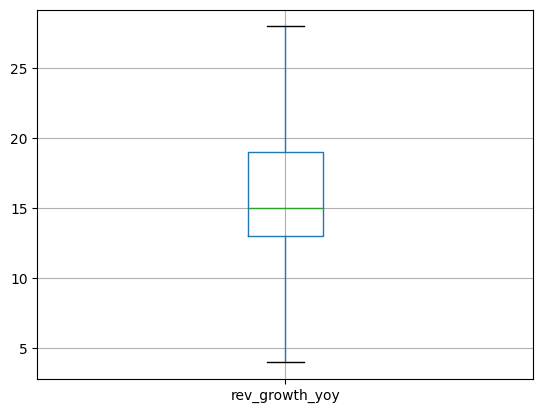

In [333]:
plt.clf()
df.boxplot(column='rev_growth_yoy').plot()
plt.show()

<b>Analyst Observation : </b>
<p>
    There are no outliers observed in the rev_growth_yoy.<br>
    Hence no outlier treatment is required.
</p>

## Data Cleaning of coupon_used_for_payment Feature

### Removing Irrelevant data from coupon_used_for_payment Feature

In [334]:
# Checking unique values with their frequencies in the coupon_used_for_payment Feature
print('Printing the value counts of coupon_used_for_payment feature: \n')
print(df['coupon_used_for_payment'].value_counts(dropna=False))
print('\nValue Counts of coupon_used_for_payment feature printed successfully')

Printing the value counts of coupon_used_for_payment feature: 

coupon_used_for_payment
1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: count, dtype: int64

Value Counts of coupon_used_for_payment feature printed successfully


In [335]:
# Replacing '#' with None
print("\nReplacing '#' with None in the coupon_used_for_payment feature : ")
df['coupon_used_for_payment'].replace('#',np.NaN,inplace=True)
print("Printing the value counts of coupon_used_for_payment feature after replacing '#' with None: \n")
print(df['coupon_used_for_payment'].value_counts(dropna=False))

# Replacing '$' with None
print("\nReplacing '$' with None in the coupon_used_for_payment feature : ")
df['coupon_used_for_payment'].replace('$',np.NaN,inplace=True)
print("Printing the value counts of coupon_used_for_payment feature after replacing '$' with None: \n")
print(df['coupon_used_for_payment'].value_counts(dropna=False))

# Replacing '*' with None
print("\nReplacing '*' with None in the coupon_used_for_payment feature : ")
df['coupon_used_for_payment'].replace('*',np.NaN,inplace=True)
print("Printing the value counts of coupon_used_for_payment feature after replacing '*' with None: \n")
print(df['coupon_used_for_payment'].value_counts(dropna=False))

print('\nTotal number of null values after replacing the irrelevant values in the coupon_used_for_payment feature is : ',df['coupon_used_for_payment'].isna().sum())


Replacing '#' with None in the coupon_used_for_payment feature : 
Printing the value counts of coupon_used_for_payment feature after replacing '#' with None: 

coupon_used_for_payment
1      4373
2      2656
0      2150
3       698
4       424
5       284
6       234
7       184
8        88
10       34
9        34
11       30
12       26
13       22
14       12
15        4
16        4
NaN       1
$         1
*         1
Name: count, dtype: int64

Replacing '$' with None in the coupon_used_for_payment feature : 
Printing the value counts of coupon_used_for_payment feature after replacing '$' with None: 

coupon_used_for_payment
1      4373
2      2656
0      2150
3       698
4       424
5       284
6       234
7       184
8        88
10       34
9        34
11       30
12       26
13       22
14       12
15        4
16        4
NaN       2
*         1
Name: count, dtype: int64

Replacing '*' with None in the coupon_used_for_payment feature : 
Printing the value counts of coupon_used_fo

<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Observed that there are irrelevant values '$,#,*' in the coupon_used_for_payment feature. Hence replaced the irrelevant values with None.</li>
        <li>Thus irrelevant data is handled in the coupon_used_for_payment feature</li>
    </ul>
</p>

### Missing Value analysis and Treatment for coupon_used_for_payment Feature

In [336]:
#Gathering statistical information on coupon_used_for_payment feature

print('\nTotal number of null values in coupon_used_for_payment feature is : ', df['coupon_used_for_payment'].isna().sum())
print('\nPercentage of null values in coupon_used_for_payment feature is : ', df['coupon_used_for_payment'].isna().mean()*100)
print('\nThe mean of coupon_used_for_payment feature is : ', df['coupon_used_for_payment'].mean())
print('\nThe median of coupon_used_for_payment feature is : ', df['coupon_used_for_payment'].median())
print('\nThe mode of coupon_used_for_payment feature is : ', df['coupon_used_for_payment'].mode())
print('\nOther statistical information on coupon_used_for_payment feature : \n')
df['coupon_used_for_payment'].describe()


Total number of null values in coupon_used_for_payment feature is :  3

Percentage of null values in coupon_used_for_payment feature is :  0.02664298401420959

The mean of coupon_used_for_payment feature is :  1.7906191702940393

The median of coupon_used_for_payment feature is :  1.0

The mode of coupon_used_for_payment feature is :  0    1.0
Name: coupon_used_for_payment, dtype: float64

Other statistical information on coupon_used_for_payment feature : 



count    11257.000000
mean         1.790619
std          1.969551
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: coupon_used_for_payment, dtype: float64

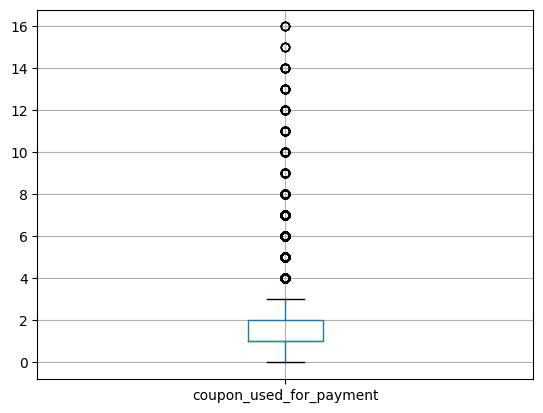

In [337]:
plt.clf()
df.boxplot(column='coupon_used_for_payment').plot()
plt.show()

In [338]:
# Replacing the missing values coupon_used_for_payment feature in with Median as there are outliers

print('The median of coupon_used_for_payment feature is : ',int(df['coupon_used_for_payment'].median()))

print('Replacing the null values in coupon_used_for_payment feature with median : \n')
df['coupon_used_for_payment'].fillna(int(df['coupon_used_for_payment'].median()), inplace=True)
print('\nAll the null values in the coupon_used_for_payment are replaced successfully with median :')

print('\nPrinting the value counts of the coupon_used_for_payment variable to check whether the null values are replace or not : \n')
print(df['coupon_used_for_payment'].value_counts(dropna=False).sort_index())

print('\nThe total number of null values in coupon_used_for_payment feature after replacing with median : ',df['coupon_used_for_payment'].isna().sum())
print('\nData type of coupon_used_for_payment feature after handling missing value is : ',df['coupon_used_for_payment'].dtype)

The median of coupon_used_for_payment feature is :  1
Replacing the null values in coupon_used_for_payment feature with median : 


All the null values in the coupon_used_for_payment are replaced successfully with median :

Printing the value counts of the coupon_used_for_payment variable to check whether the null values are replace or not : 

coupon_used_for_payment
0.0     2150
1.0     4376
2.0     2656
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: count, dtype: int64

The total number of null values in coupon_used_for_payment feature after replacing with median :  0

Data type of coupon_used_for_payment feature after handling missing value is :  float64


<b>Analyst Observation : </b>
<p>
</p>

### Outlier Detection and Treatment for coupon_used_for_payment Feature

The Maximum Cap Value of coupon_used_for_payment feature in the boxplot is :  3.0 

Displaying the Max Cap outliers boolean array :

[False False  True False  True  True  True  True  True  True  True False
  True  True  True  True  True]

The Max cap outliers in the coupon_used_for_payment feature are : 

[ 4.  9.  6. 11.  7. 12. 10.  5. 13. 15.  8. 14. 16.]

Replacing all the outliers with median :

Printing the value counts of coupon_used_for_payment feature after replacing the outliers with median : 
coupon_used_for_payment
0.0    2150
1.0    5756
2.0    2656
3.0     698
Name: count, dtype: int64

All the outlier in the coupon_used_for_payment feature are replaced successfully


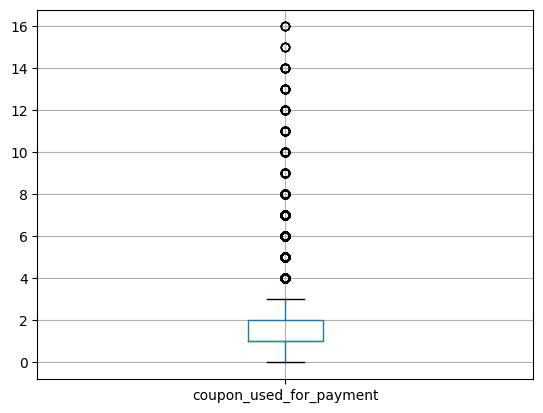

In [339]:
# As per boxplot there are outliers in the coupon_used_for_payment feature which needs to be handled. 
# Few outliers are observed above the upper cap 
# In this section the outliers above the upper cap with upper cap

# Computing the max cap value from the boxplot
BoxPlot = df.boxplot(column='coupon_used_for_payment', return_type='dict')
MaxCapValue = BoxPlot['caps'][1].get_ydata()[0]
print('The Maximum Cap Value of coupon_used_for_payment feature in the boxplot is : ',MaxCapValue, '\n' )

#Computing the list of outliers above the maxcap
OutlierBoolean = df['coupon_used_for_payment'].unique() > MaxCapValue
print('Displaying the Max Cap outliers boolean array :\n')
print(OutlierBoolean)
OutliersArr = df['coupon_used_for_payment'].unique()[OutlierBoolean]
print('\nThe Max cap outliers in the coupon_used_for_payment feature are : \n')
print(OutliersArr)

#Replacing outliers with maxcap value
print('\nReplacing all the outliers with median :\n')
df['coupon_used_for_payment'].replace(list(OutliersArr), int(df['coupon_used_for_payment'].median()), inplace=True)
print('Printing the value counts of coupon_used_for_payment feature after replacing the outliers with median : ')
print(df['coupon_used_for_payment'].value_counts(dropna=False).sort_index())
print('\nAll the outlier in the coupon_used_for_payment feature are replaced successfully')

#Deleting all the temporary variables created during outlier detection and treatment
del OutliersArr
del OutlierBoolean
del MaxCapValue
del BoxPlot

<b>Analyst Observation : </b>
<p>
</p>

## Data Cleaning of Day_Since_CC_connect Feature

### Removing Irrelevant data from Day_Since_CC_connect Feature

In [340]:
# Checking unique values with their frequencies in the Day_Since_CC_connect Feature
print('Printing the value counts of Day_Since_CC_connect feature: \n')
print(df['Day_Since_CC_connect'].value_counts(dropna=False))
print('\nValue Counts of Day_Since_CC_connect feature printed successfully')

Printing the value counts of Day_Since_CC_connect feature: 

Day_Since_CC_connect
3      1816
2      1574
1      1256
8      1169
0       964
7       911
4       893
9       622
5       479
NaN     357
10      339
6       229
11      183
12      146
13      117
14       74
15       37
17       34
16       26
18       26
30        2
31        2
47        2
$         1
46        1
Name: count, dtype: int64

Value Counts of Day_Since_CC_connect feature printed successfully


In [341]:
# Replacing '$' with None
print("Replacing '$' with None in the Day_Since_CC_connect feature")
df['Day_Since_CC_connect'].replace('$',None,inplace=True)
print("Printing the value counts of Day_Since_CC_connect feature after replacing '$' with None: \n")
print(df['Day_Since_CC_connect'].value_counts(dropna=False))
print("\nTotal number of null values in Day_Since_CC_connect feature after replacing '$' with None is : ",df['Day_Since_CC_connect'].isna().sum())

Replacing '$' with None in the Day_Since_CC_connect feature
Printing the value counts of Day_Since_CC_connect feature after replacing '$' with None: 

Day_Since_CC_connect
3       1816
2       1574
1       1256
8       1169
0        964
7        911
4        893
9        622
5        479
NaN      357
10       339
6        229
11       183
12       146
13       117
14        74
15        37
17        34
16        26
18        26
30         2
31         2
47         2
None       1
46         1
Name: count, dtype: int64

Total number of null values in Day_Since_CC_connect feature after replacing '$' with None is :  358


<b>Analyst Observation : </b>
<p>
    <ul>
        <li>Observed that there is an irrelevant value '$' in the Day_Since_CC_connect feature. Hence replaced the irrelevant value with None.</li>
        <li>Thus irrelevant data is handled in the Day_Since_CC_connect feature.</li>
    </ul>
</p>

### Missing Value analysis and Treatment for Day_Since_CC_connect Feature

In [342]:
#Gathering statistical information on Day_Since_CC_connect feature

print('\nTotal number of null values in Day_Since_CC_connect feature is : ', df['Day_Since_CC_connect'].isna().sum())
print('\nPercentage of null values in Day_Since_CC_connect feature is : ', df['Day_Since_CC_connect'].isna().mean()*100)
print('\nThe mean of Day_Since_CC_connect feature is : ', df['Day_Since_CC_connect'].mean())
print('\nThe median of Day_Since_CC_connect feature is : ', df['Day_Since_CC_connect'].median())
print('\nThe mode of Day_Since_CC_connect feature is : ', df['Day_Since_CC_connect'].mode())
print('\nOther statistical information on Day_Since_CC_connect feature : \n')
df['Day_Since_CC_connect'].describe()


Total number of null values in Day_Since_CC_connect feature is :  358

Percentage of null values in Day_Since_CC_connect feature is :  3.1793960923623446

The mean of Day_Since_CC_connect feature is :  4.6331865712713265

The median of Day_Since_CC_connect feature is :  3.0

The mode of Day_Since_CC_connect feature is :  0    3
Name: Day_Since_CC_connect, dtype: object

Other statistical information on Day_Since_CC_connect feature : 



count     10902
unique       23
top           3
freq       1816
Name: Day_Since_CC_connect, dtype: int64

In [343]:
# Replacing the missing values Day_Since_CC_connect feature in with Median

print('The median of Day_Since_CC_connect feature is : ',int(df['Day_Since_CC_connect'].median()))

print('Replacing the null values in Day_Since_CC_connect feature with median : \n')
df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median(), inplace=True)
print('\nAll the null values in the Day_Since_CC_connect are replaced successfully with median :')

print('\nPrinting the value counts of the Day_Since_CC_connect variable to check whether the null values are replace or not : \n')
print(df['Day_Since_CC_connect'].value_counts(dropna=False).sort_index())

print('\nThe total number of null values in Day_Since_CC_connect feature after replacing with median : ',df['Day_Since_CC_connect'].isna().sum())
print('\nData type of Day_Since_CC_connect feature after handling missing value is : ',df['Day_Since_CC_connect'].dtype)


The median of Day_Since_CC_connect feature is :  3
Replacing the null values in Day_Since_CC_connect feature with median : 


All the null values in the Day_Since_CC_connect are replaced successfully with median :

Printing the value counts of the Day_Since_CC_connect variable to check whether the null values are replace or not : 

Day_Since_CC_connect
0.0      964
1.0     1256
2.0     1574
3.0     2174
4.0      893
5.0      479
6.0      229
7.0      911
8.0     1169
9.0      622
10.0     339
11.0     183
12.0     146
13.0     117
14.0      74
15.0      37
16.0      26
17.0      34
18.0      26
30.0       2
31.0       2
46.0       1
47.0       2
Name: count, dtype: int64

The total number of null values in Day_Since_CC_connect feature after replacing with median :  0

Data type of Day_Since_CC_connect feature after handling missing value is :  float64


<b>Analyst Observation : </b>
<p>
</p>

### Outlier Detection and Treatment for Day_Since_CC_connect Feature

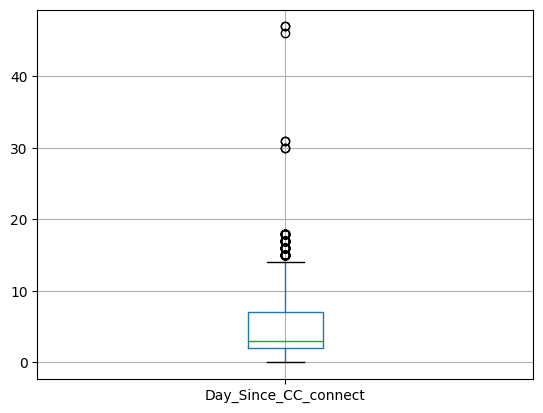

In [344]:
plt.clf()
df.boxplot(column='Day_Since_CC_connect').plot()
plt.show()

The Maximum Cap Value of Day_Since_CC_connect feature in the boxplot is :  14.0 

Displaying the Max Cap outliers boolean array :

[False False False False False False False False False  True False False
 False False False  True  True False  True  True  True  True  True]

The Max cap outliers in the Day_Since_CC_connect feature are : 

[15. 17. 16. 30. 46. 18. 31. 47.]

Replacing all the outliers with median 

Printing the value counts of Day_Since_CC_connect feature after replacing the outliers with median
Day_Since_CC_connect
0.0      964
1.0     1256
2.0     1574
3.0     2304
4.0      893
5.0      479
6.0      229
7.0      911
8.0     1169
9.0      622
10.0     339
11.0     183
12.0     146
13.0     117
14.0      74
Name: count, dtype: int64

All the outlier in the Day_Since_CC_connect feature are replaced successfully


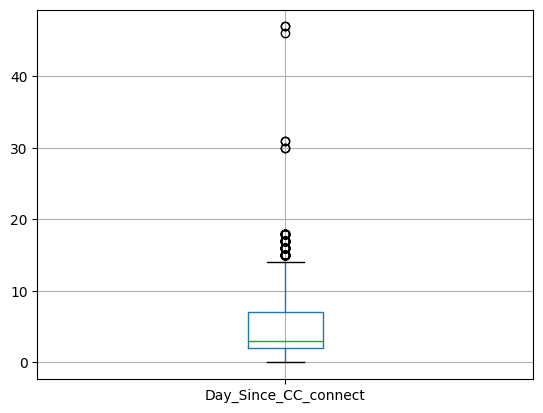

In [345]:
# As per boxplot there are outliers in the Day_Since_CC_connect feature which needs to be handled. 
# Few outliers are observed above the upper cap 
# In this section the outliers above the upper cap with upper cap

# Computing the max cap value from the boxplot
BoxPlot = df.boxplot(column='Day_Since_CC_connect', return_type='dict')
MaxCapValue = BoxPlot['caps'][1].get_ydata()[0]
print('The Maximum Cap Value of Day_Since_CC_connect feature in the boxplot is : ',MaxCapValue, '\n' )

#Computing the list of outliers above the maxcap
OutlierBoolean = df['Day_Since_CC_connect'].unique() > MaxCapValue
print('Displaying the Max Cap outliers boolean array :\n')
print(OutlierBoolean)
OutliersArr = df['Day_Since_CC_connect'].unique()[OutlierBoolean]
print('\nThe Max cap outliers in the Day_Since_CC_connect feature are : \n')
print(OutliersArr)

#Replacing outliers with maxcap value
print('\nReplacing all the outliers with median \n')
df['Day_Since_CC_connect'].replace(list(OutliersArr), df['Day_Since_CC_connect'].median(), inplace=True)
print('Printing the value counts of Day_Since_CC_connect feature after replacing the outliers with median')
print(df['Day_Since_CC_connect'].value_counts(dropna=False).sort_index())
print('\nAll the outlier in the Day_Since_CC_connect feature are replaced successfully')

#Deleting all the temporary variables created during outlier detection and treatment
del OutliersArr
del OutlierBoolean
del MaxCapValue
del BoxPlot

<b>Analyst Observation : </b>
<p>
</p>

## Data Cleaning of cashback Feature

### Removing Irrelevant data from cashback Feature

In [346]:
# Checking unique values with their frequencies in the cashback Feature
print('Printing the value counts of cashback feature: \n')
print(df['cashback'].value_counts(dropna=False))
print('\nValue Counts of cashback feature printed successfully')

Printing the value counts of cashback feature: 

cashback
NaN       471
155.62     10
149.68      9
154.73      9
145.08      9
         ... 
131.55      1
245.64      1
130.78      1
299.72      1
191.42      1
Name: count, Length: 5694, dtype: int64

Value Counts of cashback feature printed successfully


In [347]:
# Replacing the irrelevant data '$' with None
print("Replacing the irrelevant data '$' with None : \n")
df['cashback'].replace('$', np.NaN, inplace=True)
print("\nReplaced the irrelevant data '$' with None successfully:")

print('Printing the value counts of cashback feature after successfully replacing the irrelevant data: \n')
print(df['cashback'].value_counts(dropna=False))

Replacing the irrelevant data '$' with None : 


Replaced the irrelevant data '$' with None successfully:
Printing the value counts of cashback feature after successfully replacing the irrelevant data: 

cashback
NaN       473
155.62     10
145.08      9
154.73      9
149.68      9
         ... 
131.55      1
245.64      1
130.78      1
299.72      1
191.42      1
Name: count, Length: 5693, dtype: int64


<b>Analyst Observation : </b>
<p>
</p>

### Missing Value analysis and Treatment for cashback Feature

In [348]:
#Gathering statistical information on cashback feature

print('\nTotal number of null values in cashback feature is : ', df['cashback'].isna().sum())
print('\nPercentage of null values in cashback feature is : ', df['cashback'].isna().mean()*100)
print('\nThe mean of cashback feature is : ', df['cashback'].mean())
print('\nThe median of cashback feature is : ', df['cashback'].median())
print('\nThe mode of cashback feature is : ', df['cashback'].mode())
print('\nOther statistical information on cashback feature : \n')
df['cashback'].describe()


Total number of null values in cashback feature is :  473

Percentage of null values in cashback feature is :  4.200710479573712

The mean of cashback feature is :  196.23636970427364

The median of cashback feature is :  165.25

The mode of cashback feature is :  0    155.62
Name: cashback, dtype: float64

Other statistical information on cashback feature : 



count    10787.000000
mean       196.236370
std        178.660514
min          0.000000
25%        147.210000
50%        165.250000
75%        200.010000
max       1997.000000
Name: cashback, dtype: float64

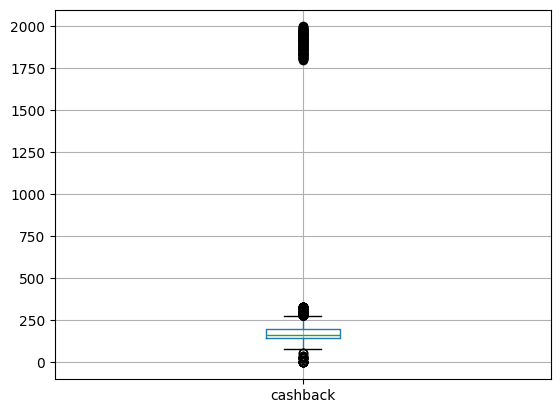

In [349]:
plt.clf()
df.boxplot(column='cashback').plot()
plt.show()

In [350]:
# Cash back is a continuous discrete variable and has outliers
# Hence replacing the cashback feature with Median

medianvalue = df['cashback'].median()
print('The Median of the cashback feature is before replacing outliers with median : ',df['cashback'].median(),'\n')
print('The frequency of median value is : ', df['cashback'].value_counts(dropna=False)[medianvalue])
df['cashback'].fillna(df['cashback'].median(),inplace=True)
print('Printing the value counts of the cashback variable to check whether the null values are replace or not : ')
print(df['cashback'].value_counts(dropna=False).sort_index())
print('\nThe frequency of median value after replacing the outliers with median is : ', df['cashback'].value_counts(dropna=False)[medianvalue])
print('Data type of cashback feature after handling missing value is : ', df['cashback'].dtype)

The Median of the cashback feature is before replacing outliers with median :  165.25 

The frequency of median value is :  5
Printing the value counts of the cashback variable to check whether the null values are replace or not : 
cashback
0.0       4
2.0       1
3.0       1
4.0       1
5.0       1
         ..
1984.0    1
1985.0    1
1991.0    1
1992.0    1
1997.0    1
Name: count, Length: 5692, dtype: int64

The frequency of median value after replacing the outliers with median is :  478
Data type of cashback feature after handling missing value is :  float64


<b>Analyst Observation : </b>
<p>
</p>

### Outlier Detection and Treatment for cashback Feature

In [351]:
#Checking the top 5 records in the given data
pd.options.display.max_columns = None
print('Printing the top 5 records of the data frame')
df.head(5)

Printing the top 5 records of the data frame


,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9.0,1.0,11,1.0,5.0,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7.0,1.0,15,0.0,0.0,120.90,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6.0,1.0,14,0.0,3.0,165.25,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8.0,0.0,23,0.0,3.0,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3.0,0.0,11,1.0,3.0,129.60,Mobile


The Maximum Cap Value of cashback feature in the boxplot is :  271.36 

The Minimum Cap Value of cashback feature in the boxplot is :  81.0 

Displaying the cashback outliers boolean array :

[False False False ... False False False]

The outliers in the cashback feature are : 

[ 295.45 1974.    299.26  290.33  287.22  299.99  292.32  295.17  290.68
 1955.    294.36  290.45  291.44  275.84  286.65 1813.    292.72  283.
 1862.    294.06  291.97 1982.    295.66  280.41  278.61  295.02  282.
  295.13  291.41  291.89  298.59  284.3   276.39  292.46  271.59  279.24
  274.44  273.99  294.19 1840.    283.03  299.73  298.45  276.5   292.37
  296.27  276.65  274.65  296.26  299.43  286.06 1920.    278.56  290.81
  277.79  297.4   287.11  282.65  282.13  288.24  287.89  298.47 1908.
  291.9   280.61 1865.   1945.    291.87  297.17  273.28  297.01 1843.
  295.86  293.31  296.13  275.67 1803.    290.49  296.58 1844.    274.26
  276.03  290.38  293.28  293.92  296.65  271.74  278.75  291.61  296.3

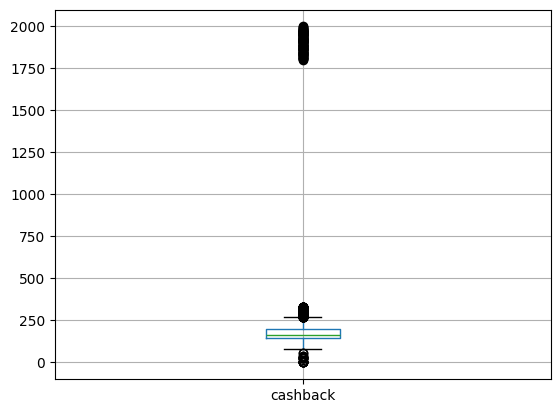

In [352]:
# There are outliers in cashback and they have to be handled
# Computing the max cap and min cap value from the boxplot

BoxPlot = df.boxplot(column='cashback', return_type='dict')
MaxCapValue = BoxPlot['caps'][1].get_ydata()[0]
MinCapValue = BoxPlot['caps'][0].get_ydata()[0]
print('The Maximum Cap Value of cashback feature in the boxplot is : ',MaxCapValue, '\n' )
print('The Minimum Cap Value of cashback feature in the boxplot is : ',MinCapValue, '\n' )

#Computing the list of outliers above the upperlimit
OutlierBoolean = df['cashback'].unique() > MaxCapValue
print('Displaying the cashback outliers boolean array :\n')
print(OutlierBoolean)
OutliersArr = df['cashback'].unique()[OutlierBoolean]
print('\nThe outliers in the cashback feature are : \n')
print(OutliersArr)

#Replacing outliers above the upperlimit with maxcap value
print('\nReplacing all the outliers with maxcap value \n')
df['cashback'].replace(list(OutliersArr), MaxCapValue, inplace=True)
print('Printing the value counts of cashback feature after replacing the outliers with maxcap value')
print(df['cashback'].value_counts(dropna=False).sort_index())

#Computing the list of outliers below the lowerlimit
MinCapOutlierBoolean = df['cashback'].unique() < MinCapValue
print('Displaying the cashback mincap outliers boolean array :\n')
print(MinCapOutlierBoolean)
MinCapOutliersArr = df['cashback'].unique()[MinCapOutlierBoolean]
print('\nThe mincap outliers in the cashback feature are : \n')
print(MinCapOutliersArr)

#Replacing outliers below the upperlimit with mincap value
print('\nReplacing all the outliers with mincap value \n')
df['cashback'].replace(list(MinCapOutliersArr), MinCapValue, inplace=True)
print('Printing the value counts of cashback feature after replacing the outliers with mincap value')
print(df['cashback'].value_counts(dropna=False).sort_index())

print('\nAll the outlier in the cashback feature are replaced successfully')


#Deleting all the temporary variables created during outlier detection and treatment
del OutliersArr
del MinCapOutliersArr
del OutlierBoolean
del MinCapOutlierBoolean
del MaxCapValue
del MinCapValue
del BoxPlot

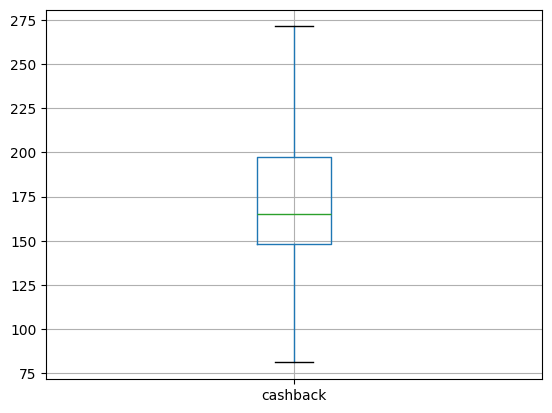

In [353]:
#Generating boxplot after replacing outliers

df.boxplot(column='cashback').plot()
plt.show()

<b>Analyst Observation : </b>
<p>
</p>

## Data Cleaning of Login_device Feature

### Removing Irrelevant data from Login_device Feature

In [354]:
# Checking unique values with their frequencies in the Login_device Feature
print('Printing the value counts of Login_device feature: \n')
print(df['Login_device'].value_counts(dropna=False))
print('\nValue Counts of Login_device feature printed successfully')

Printing the value counts of Login_device feature: 

Login_device
Mobile      7482
Computer    3018
&&&&         539
NaN          221
Name: count, dtype: int64

Value Counts of Login_device feature printed successfully


In [355]:
#Replacing &&&& with None in the Login_device feature
print('Replacing &&&& with None in the Login_device feature :\n')
df['Login_device'].replace('&&&&', None, inplace=True)
print('Printing the value counts of Login_device feature after replacing &&&& with None: \n')
print(df['Login_device'].value_counts(dropna=False))
print('\nTotal number of null values in the Login_device feature is : ',df['Login_device'].isna().sum())

Replacing &&&& with None in the Login_device feature :

Printing the value counts of Login_device feature after replacing &&&& with None: 

Login_device
Mobile      7482
Computer    3018
None         539
NaN          221
Name: count, dtype: int64

Total number of null values in the Login_device feature is :  760


<b>Analyst Observation : </b>
<p>
    <ol>
        <li>Observed that there is an irrelevant value '&&&&' in the Login_devices feature. Hence replaced the irrelevant value with None</li>
        <li>Thus the irrelevant data is treated in the Login_devices feature</li>
    </ol>
</p>

### Missing Value analysis and Treatment for Login_device Feature

In [356]:
# Login_device is a categorical variable, hence replacing the missing values with mode

print('Total number of null values in the Login_device feature are : ',df['Login_device'].isna().sum())
print('The mode of the Login_device feature is ',df['Login_device'].mode()[0])
print('Replacing the null values in the Login_device with mode\n')
df['Login_device'].fillna(df['Login_device'].mode()[0],inplace=True)
print('Null values in Login_device Feature replaced successfully')
print('\nPrinting the value counts of Login_device feature after replacing the null values with mode : \n')
print(df['Login_device'].value_counts(dropna=False).sort_index())
print('\nTotal number of null values in the Login_device feature after replacing the null values with mode is : ',df['Login_device'].isna().sum())

Total number of null values in the Login_device feature are :  760
The mode of the Login_device feature is  Mobile
Replacing the null values in the Login_device with mode

Null values in Login_device Feature replaced successfully

Printing the value counts of Login_device feature after replacing the null values with mode : 

Login_device
Computer    3018
Mobile      8242
Name: count, dtype: int64

Total number of null values in the Login_device feature after replacing the null values with mode is :  0


<b>Analyst Observation : </b>
<p>
</p>

### Outlier Detection and Treatment for Login_device Feature

<b>Analyst Observation : </b>
<p>
    There are no outliers in the Login_device feature.<br>
    Hence no outlier treatment is required for this feature.
</p>

## Checking whether the data cleaning is successfull

In [357]:
print('printing the sum of null values to check if there are any null values still exists')
print(df.isna().sum())

printing the sum of null values to check if there are any null values still exists
AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64


# Data Transformation

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  int64  
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  int64  
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

### Variable Transformation for Payment Feature

In [359]:
# Performing data Transformation for Payment Feature
print('Printing Payment feature value counts before variable Transformation')
print(df['Payment'].value_counts(dropna=False).sort_index())
print()

df['Payment'] = df['Payment'].astype('category')
df['Payment'] = df['Payment'].cat.reorder_categories(['Cash on Delivery','Credit Card','Debit Card','E wallet','UPI'], ordered=True)
df['Payment'] = df['Payment'].cat.codes

print('\nPrinting Payment feature value counts after variable Transformation : ')
print(df['Payment'].value_counts(dropna=False).sort_index())

Printing Payment feature value counts before variable Transformation
Payment
Cash on Delivery    1014
Credit Card         3511
Debit Card          4696
E wallet            1217
UPI                  822
Name: count, dtype: int64


Printing Payment feature value counts after variable Transformation : 
Payment
0    1014
1    3511
2    4696
3    1217
4     822
Name: count, dtype: int64


### Variable Transformation for Gender Feature

In [360]:
# Performing data Transformation for Gender Feature
print('Printing Gender feature value counts before variable Transformation')
print(df['Gender'].value_counts(dropna=False).sort_index())
print()

df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.reorder_categories(['Female','Male'], ordered=True)
df['Gender'] = df['Gender'].cat.codes

print('\nPrinting Gender feature value counts before variable Transformation : ')
print(df['Gender'].value_counts(dropna=False).sort_index())

Printing Gender feature value counts before variable Transformation
Gender
Female    4448
Male      6812
Name: count, dtype: int64


Printing Gender feature value counts before variable Transformation : 
Gender
0    4448
1    6812
Name: count, dtype: int64


### Variable Transformation for account_segment Feature

In [361]:
# Performing data Transformation for account_segment Feature
print('Printing account_segment feature value counts before variable Transformation')
print(df['account_segment'].value_counts(dropna=False).sort_index())
print()

df['account_segment'] = df['account_segment'].astype('category')
df['account_segment'] = df['account_segment'].cat.reorder_categories(['HNI','Regular','Regular Plus','Super','Super Plus'], ordered=True)
df['account_segment'] = df['account_segment'].cat.codes

print('\nPrinting account_segment feature value counts before variable Transformation : ')
print(df['account_segment'].value_counts(dropna=False).sort_index())

Printing account_segment feature value counts before variable Transformation
account_segment
HNI             1639
Regular          520
Regular Plus    4221
Super           4062
Super Plus       818
Name: count, dtype: int64


Printing account_segment feature value counts before variable Transformation : 
account_segment
0    1639
1     520
2    4221
3    4062
4     818
Name: count, dtype: int64


### Variable Transformation for Marital_Status Feature

In [362]:
# Performing data Transformation for Marital_Status Feature
print('Printing Marital_Status feature value counts before variable Transformation')
print(df['Marital_Status'].value_counts(dropna=False).sort_index())
print()

df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Marital_Status'] = df['Marital_Status'].cat.reorder_categories(['Divorced','Married','Single'], ordered=True)
df['Marital_Status'] = df['Marital_Status'].cat.codes

print('\nPrinting Marital_Status feature value counts before variable Transformation : ')
print(df['Marital_Status'].value_counts(dropna=False).sort_index())

Printing Marital_Status feature value counts before variable Transformation
Marital_Status
Divorced    1668
Married     6072
Single      3520
Name: count, dtype: int64


Printing Marital_Status feature value counts before variable Transformation : 
Marital_Status
0    1668
1    6072
2    3520
Name: count, dtype: int64


### Variable Transformation for Login_device Feature

In [363]:
# Performing data Transformation for Login_device Feature
print('Printing Login_device feature value counts before variable Transformation')
print(df['Login_device'].value_counts(dropna=False).sort_index())
print()

df['Login_device'] = df['Login_device'].astype('category')
df['Login_device'] = df['Login_device'].cat.reorder_categories(['Computer','Mobile'], ordered=True)
df['Login_device'] = df['Login_device'].cat.codes

print('\nPrinting Login_device feature value counts before variable Transformation : ')
print(df['Login_device'].value_counts(dropna=False).sort_index())

Printing Login_device feature value counts before variable Transformation
Login_device
Computer    3018
Mobile      8242
Name: count, dtype: int64


Printing Login_device feature value counts before variable Transformation : 
Login_device
0    3018
1    8242
Name: count, dtype: int64


In [364]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  int64  
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  int8   
 6   Gender                   11260 non-null  int8   
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  int64  
 9   account_segment          11260 non-null  int8   
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  int8   
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

### Droping AccountID

In [365]:
# Droping AccountID
df.drop('AccountID', axis='columns',inplace=True)
print('Checking the columns of df to check the AccountID is removed or not')
print(df.info())

Checking the columns of df to check the AccountID is removed or not
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  int64  
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  int8   
 5   Gender                   11260 non-null  int8   
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  int8   
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  int8   
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_grow

# Modeling

## Splitting Train and Test Data

In [366]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

print('Printing x Info :\n')
print(x.info())

print('Printing y Info :\n')
print(y.info())

Printing x Info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  int64  
 1   City_Tier                11260 non-null  float64
 2   CC_Contacted_LY          11260 non-null  float64
 3   Payment                  11260 non-null  int8   
 4   Gender                   11260 non-null  int8   
 5   Service_Score            11260 non-null  float64
 6   Account_user_count       11260 non-null  int64  
 7   account_segment          11260 non-null  int8   
 8   CC_Agent_Score           11260 non-null  float64
 9   Marital_Status           11260 non-null  int8   
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  float64
 12  rev_growth_yoy           11260 non-null  int64  
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day

In [367]:
# split into 70:30 ration
print('Splitting Train and Test data :\n')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print('Completed splitting the Train and Test Data successfully :\n')

Splitting Train and Test data :

Completed splitting the Train and Test Data successfully :



In [368]:
# Information about the Training Data
print("Number transactions X_train dataset : ", x_train.shape) 
print("Number transactions y_train dataset : ", y_train.shape)
print('Number of records with value 1 in y_train : ', sum(y_train == 1))
print('Number of records with value 0 in Y_train : ', sum(y_train == 0))

Number transactions X_train dataset :  (7882, 17)
Number transactions y_train dataset :  (7882,)
Number of records with value 1 in y_train :  1341
Number of records with value 0 in Y_train :  6541


<b>Analyst Observation :</b>
<p>It is observed that there are 1341 records with value 1 in train data and 6541 records with value 0.</p>
<p>Hence there is an imbalanced data observed.</p>

In [369]:
# Information about the Test Data
print("Number transactions X_test dataset : ", x_test.shape) 
print("Number transactions y_test dataset : ", y_test.shape)
print('Number of records with value 1 in y_test : ',sum(y_test == 1))
print('Number of records with value 0 in y_test : ',sum(y_test == 0))

Number transactions X_test dataset :  (3378, 17)
Number transactions y_test dataset :  (3378,)
Number of records with value 1 in y_test :  555
Number of records with value 0 in y_test :  2823


<b>Analyst Observation :</b>
<p>It is observed that there are 555 records with value 1 in test data and 2823 records with value 0.</p>
<p>Hence there is an imbalanced data observed.</p>

## Handling Imbalanced Data

### Handling Imbalanced Train Data

In [370]:
# Initializing SMOTE module
sm = SMOTE(random_state = 2)

In [371]:
# Handling imbalanced Train Data using SMOTE module in IBLEARN library
print("Number transactions X_train dataset before resampling : ", x_train.shape)
print("Number transactions y_train dataset before resampling : ", y_train.shape)
print()
print('Resampling Train Data')
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())
print('Completed resampling train data successfully')
print()
print("Number transactions X_train dataset after resampling : ", x_train.shape)
print("Number transactions y_train dataset after resampling : ", y_train.shape)

Number transactions X_train dataset before resampling :  (7882, 17)
Number transactions y_train dataset before resampling :  (7882,)

Resampling Train Data
Completed resampling train data successfully

Number transactions X_train dataset after resampling :  (13082, 17)
Number transactions y_train dataset after resampling :  (13082,)


In [372]:
#Verifying the Churn variable in the training data after resampling using SMOTE Algorithm
print('Number of records with value 1 in y_train : ', sum(y_train == 1))
print('Number of records with value 0 in Y_train : ', sum(y_train == 0))

Number of records with value 1 in y_train :  6541
Number of records with value 0 in Y_train :  6541


<b>Analyst Observation : </b>
<p>After resampling it is observed that there are equal number of 1's and 0's in the churn variable of Training data.</p>
<p>Hence it is confirmed that the training dataset is balanced.</p>

### Handling imbalanced Test Data

In [373]:
# Handling imbalanced Test Data using SMOTE module in IBLEARN library
print("Number transactions X_test dataset before resampling : ", x_test.shape)
print("Number transactions y_test dataset before resampling : ", y_test.shape)
print()
print('Resampling Test Dataset')
x_test, y_test = sm.fit_resample(x_test, y_test.ravel())
print('Completed resampling test data successfully')
print()
print("Number transactions X_test dataset after resampling : ", x_test.shape)
print("Number transactions y_test dataset after resampling : ", y_test.shape)

Number transactions X_test dataset before resampling :  (3378, 17)
Number transactions y_test dataset before resampling :  (3378,)

Resampling Test Dataset
Completed resampling test data successfully

Number transactions X_test dataset after resampling :  (5646, 17)
Number transactions y_test dataset after resampling :  (5646,)


In [374]:
#Verifying the Churn variable in the testing data after resampling using SMOTE Algorithm
print('Number of records with value 1 in y_test : ', sum(y_test == 1))
print('Number of records with value 0 in Y_test : ', sum(y_test == 0))

Number of records with value 1 in y_test :  2823
Number of records with value 0 in Y_test :  2823


<b>Analyst Observation : </b>
<p>After resampling it is observed that there are equal number of 1's and 0's in the churn variable of Testing data.</p>
<p>Hence it is confirmed that the testing dataset is balanced.</p>

## Creating Logistic Regression Model

In [375]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [376]:
scaled_x_train

array([[ 1.11670631, -0.77828473, -0.61012701, ..., -0.59044589,
        -1.21146377, -1.37190839],
       [-0.51533205, -0.77828473,  0.08968095, ..., -0.59044589,
        -0.15418209, -1.37190839],
       [ 0.23791643, -0.77828473, -0.37685769, ..., -0.59044589,
        -0.6523198 ,  0.72891164],
       ...,
       [-0.89195628, -0.77828473, -0.61012701, ..., -0.50890421,
        -1.02402191, -1.37190839],
       [-0.76641487, -0.77828473,  1.59114268, ..., -0.63034516,
        -0.45228161,  0.72891164],
       [ 1.11670631,  0.76289413,  1.84667909, ..., -0.31612538,
         1.50602633,  0.72891164]])

In [398]:
log_model = LogisticRegressionCV()

In [399]:
log_model.fit(scaled_x_train, y_train)

LogisticRegressionCV()

### Evaluating Logistic regression model on the training data

In [400]:
#creating dataframe to hald the value of performance metrics
ModelPerformanceDf = pd.DataFrame(columns = ['Model Name','Train Accuracy','Test Accuracy','Train Precision','Test Precision','Train Recall', 'Test Recall', 'Train F1 Score','Test F1 Score','Train Accuracy Score','Test Accuracy Score'])
ModelPerformanceDf.at[0,'Model Name'] = 'Logistic Regression'

In [401]:
ytrain_pred = log_model.predict(scaled_x_train)

In [402]:
# Generating Confusion matrix for Training Data of LR Model
ytrain_CM = confusion_matrix(ytrain_pred, y_train)
print(ytrain_CM)

[[5161  996]
 [1380 5545]]


In [403]:
#Accuracy of the LR Model on train data is
ModelPerformanceDf.at[0,'Train Accuracy'] = (ytrain_CM[0][0]+ytrain_CM[1][1])/(ytrain_CM[0][0]+ytrain_CM[0][1]+ytrain_CM[1][0]+ytrain_CM[1][1])
print('Accuracy of the LR Model on Train data is : ', ModelPerformanceDf.at[0,'Train Accuracy'])

Accuracy of the LR Model on Train data is :  0.818376395046629


In [404]:
# Precision of the LR Model on train data is
ModelPerformanceDf.at[0,'Train Precision'] = (ytrain_CM[0][0])/(ytrain_CM[0][0]+ytrain_CM[0][1])
print('Precision of the LR Model on Train data is : ', ModelPerformanceDf.at[0,'Train Precision'])

Precision of the LR Model on Train data is :  0.8382329056358616


In [405]:
# Recall / Sensitivity of the LR Model on Train data is :
ModelPerformanceDf.at[0,'Train Recall'] = (ytrain_CM[0][0])/(ytrain_CM[0][0]+ytrain_CM[1][0])
print('Recall / Sensitivity of the LR Model on Train data is :', ModelPerformanceDf.at[0,'Train Recall'])

Recall / Sensitivity of the LR Model on Train data is : 0.789023085155175


In [406]:
# F1 Score of the LR Model on Train data is :
ModelPerformanceDf.at[0,'Train F1 Score'] = (2*ModelPerformanceDf.at[0,'Train Recall']*ModelPerformanceDf.at[0,'Train Precision'])/(ModelPerformanceDf.at[0,'Train Precision']+ModelPerformanceDf.at[0,'Train Recall'])
print('F1 Score of the LR Model on Train data is :', ModelPerformanceDf.at[0,'Train F1 Score'])

F1 Score of the LR Model on Train data is : 0.8128839187273585


In [407]:
# Accuracy Score of LR Model on Trainging Data
ModelPerformanceDf.at[0,'Train Accuracy Score'] = accuracy_score(ytrain_pred, y_train)
print('Accuracy of LR model on the Train Data is : ', ModelPerformanceDf.at[0,'Train Accuracy Score'])

Accuracy of LR model on the Train Data is :  0.818376395046629


In [408]:
# Classification Report of LR Model on Training Data
print('Classification report of LR Model on the training data')
print(classification_report(ytrain_pred, y_train))

Classification report of LR Model on the training data
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      6157
           1       0.85      0.80      0.82      6925

    accuracy                           0.82     13082
   macro avg       0.82      0.82      0.82     13082
weighted avg       0.82      0.82      0.82     13082



### Evaluation Logistic Regression Model on Test Data

In [409]:
y_pred = log_model.predict(scaled_x_test)

In [410]:
ytest_CM = confusion_matrix(y_pred, y_test)
print(ytest_CM)

[[2264  445]
 [ 559 2378]]


In [411]:
#Accuracy of the Model on Test data is
ModelPerformanceDf.at[0,'Test Accuracy'] = (ytest_CM[0][0]+ytest_CM[1][1])/(ytest_CM[0][0]+ytest_CM[0][1]+ytest_CM[1][0]+ytest_CM[1][1])
print('Accuracy of the Model on Test data is : ', ModelPerformanceDf.at[0,'Test Accuracy'])

Accuracy of the Model on Test data is :  0.8221749911441729


In [412]:
# Precision of the Model on Test data is
ModelPerformanceDf.at[0,'Test Precision'] = (ytest_CM[0][0])/(ytest_CM[0][0]+ytest_CM[0][1])
print('Precision of the Model on Test data is : ',ModelPerformanceDf.at[0,'Test Precision'])

Precision of the Model on Test data is :  0.8357327427094869


In [413]:
# Recall / Sensitivity of the Model on Test data is :
ModelPerformanceDf.at[0,'Test Recall'] = (ytest_CM[0][0])/(ytest_CM[0][0]+ytest_CM[1][0])
print('Recall / Sensitivity of on Test data is :',ModelPerformanceDf.at[0,'Test Recall'])

Recall / Sensitivity of on Test data is : 0.801983705278073


In [414]:
# F1 Score of the LR Model on Test data is :
ModelPerformanceDf.at[0,'Test F1 Score'] = (2*ModelPerformanceDf.at[0,'Test Recall']*ModelPerformanceDf.at[0,'Test Precision'])/(ModelPerformanceDf.at[0,'Test Precision']+ModelPerformanceDf.at[0,'Test Recall'])
print('F1 Score of the LR Model on Test data is :', ModelPerformanceDf.at[0,'Test F1 Score'])

F1 Score of the LR Model on Test data is : 0.8185104844540854


In [415]:
# Accuracy Score
ModelPerformanceDf.at[0,'Test Accuracy Score'] = accuracy_score(y_pred, y_test)
print('Accuracy Score of LR Model on the Test Data is : ',ModelPerformanceDf.at[0,'Test Accuracy Score'])

Accuracy Score of LR Model on the Test Data is :  0.8221749911441729


In [416]:
# Classification Report
print('Classification Report of LR Model on the Test Data')
print(classification_report(y_pred, y_test))

Classification Report of LR Model on the Test Data
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2709
           1       0.84      0.81      0.83      2937

    accuracy                           0.82      5646
   macro avg       0.82      0.82      0.82      5646
weighted avg       0.82      0.82      0.82      5646



## Creating a Random Forest Classification Model

In [417]:
clf = RandomForestClassifier()

In [418]:
clf.fit(scaled_x_train, y_train)

RandomForestClassifier()

### Evaluating Random Forest Classifier on train data

In [419]:
# Creating a new row to update Random forest Classifier performance metrics to ModelPerformanceDf dataframe 
ModelPerformanceDf.at[1,'Model Name'] = 'Random Forest Classifier'

In [420]:
RF_y_train_pred = clf.predict(scaled_x_train)

In [421]:
RF_ytrain_CM = confusion_matrix(RF_y_train_pred, y_train)
print(RF_ytrain_CM)

[[6541    0]
 [   0 6541]]


In [422]:
#Accuracy of the Random forest Classifier Model on Train data is
ModelPerformanceDf.at[1,'Train Accuracy'] = (RF_ytrain_CM[0][0]+RF_ytrain_CM[1][1])/(RF_ytrain_CM[0][0]+RF_ytrain_CM[0][1]+RF_ytrain_CM[1][0]+RF_ytrain_CM[1][1])
print('Accuracy of the Random forest Classifier Model on Train data is : ', ModelPerformanceDf.at[1,'Train Accuracy'])

Accuracy of the Random forest Classifier Model on Train data is :  1.0


In [423]:
# Precision of the Random forest Classifier Model on Train data is
ModelPerformanceDf.at[1,'Train Precision'] = (RF_ytrain_CM[0][0])/(RF_ytrain_CM[0][0]+RF_ytrain_CM[0][1])
print('Precision of the Random forest Classifier Model on Train data is : ',ModelPerformanceDf.at[1,'Train Precision'])

Precision of the Random forest Classifier Model on Train data is :  1.0


In [424]:
# Recall / Sensitivity of the Random forest Classifier Model on Train data is :
ModelPerformanceDf.at[1,'Train Recall'] = (RF_ytrain_CM[0][0])/(RF_ytrain_CM[0][0]+RF_ytrain_CM[1][0])
print('Recall / Sensitivity of Random forest Classifier Model on Train data is :', ModelPerformanceDf.at[1,'Train Recall'])

Recall / Sensitivity of Random forest Classifier Model on Train data is : 1.0


In [425]:
# F1 Score of the Random Forest Classifier Model on Train data is :
ModelPerformanceDf.at[1,'Train F1 Score'] = (2*ModelPerformanceDf.at[1,'Train Recall']*ModelPerformanceDf.at[1,'Train Precision'])/(ModelPerformanceDf.at[1,'Train Precision']+ModelPerformanceDf.at[1,'Train Recall'])
print('F1 Score of the Random Forest Regression Model on Train data is :', ModelPerformanceDf.at[1,'Train F1 Score'])

F1 Score of the Random Forest Regression Model on Train data is : 1.0


In [426]:
ModelPerformanceDf.at[1,'Train Accuracy Score'] = accuracy_score(RF_y_train_pred, y_train)
print('Accuracy Score of Random Forest Regression Model on Train data is : ', ModelPerformanceDf.at[1,'Train Accuracy Score'])

Accuracy Score of Random Forest Regression Model on Train data is :  1.0


In [427]:
# Classification Report of the Random forest Classifier Model on Train data is
print(classification_report(RF_y_train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6541
           1       1.00      1.00      1.00      6541

    accuracy                           1.00     13082
   macro avg       1.00      1.00      1.00     13082
weighted avg       1.00      1.00      1.00     13082



### Evaluating Random Forest Classifier on test data

In [428]:
RF_y_test_pred = clf.predict(scaled_x_test)

In [429]:
RF_ytest_CM = confusion_matrix(RF_y_test_pred, y_test)
print(RF_ytest_CM)

[[2780  127]
 [  43 2696]]


In [430]:
#Accuracy of the Random forest Classifier Model on Test data is
ModelPerformanceDf.at[1,'Test Accuracy'] = (RF_ytest_CM[0][0]+RF_ytest_CM[1][1])/(RF_ytest_CM[0][0]+RF_ytest_CM[0][1]+RF_ytest_CM[1][0]+RF_ytest_CM[1][1])
print('Accuracy of the Random forest Classifier Model on Test data is : ', ModelPerformanceDf.at[1,'Test Accuracy'])

Accuracy of the Random forest Classifier Model on Test data is :  0.9698901877435352


In [431]:
# Precision of the Random forest Classifier Model on Test data is
ModelPerformanceDf.at[1,'Test Precision'] = (RF_ytest_CM[0][0])/(RF_ytest_CM[0][0]+RF_ytest_CM[0][1])
print('Precision of the Random forest Classifier Model on Test data is : ', ModelPerformanceDf.at[1,'Test Precision'])

Precision of the Random forest Classifier Model on Test data is :  0.956312349501204


In [432]:
# Recall / Sensitivity of the Random forest Classifier Model on Test data is :
ModelPerformanceDf.at[1,'Test Recall'] = (RF_ytest_CM[0][0])/(RF_ytest_CM[0][0]+RF_ytest_CM[1][0])
print('Recall / Sensitivity of Random forest Classifier Model on Test data is :', ModelPerformanceDf.at[1,'Test Recall'])

Recall / Sensitivity of Random forest Classifier Model on Test data is : 0.9847679773290825


In [433]:
# F1 Score of the Random Forest Classifier Model on Test data is :
ModelPerformanceDf.at[1,'Test F1 Score'] = (2*ModelPerformanceDf.at[1,'Test Recall']*ModelPerformanceDf.at[1,'Test Precision'])/(ModelPerformanceDf.at[1,'Test Precision']+ModelPerformanceDf.at[1,'Test Recall'])
print('F1 Score of the Random Forest Classifier Model on Test data is :', ModelPerformanceDf.at[1,'Test F1 Score'])

F1 Score of the Random Forest Classifier Model on Test data is : 0.9703315881326353


In [434]:
ModelPerformanceDf.at[1,'Test Accuracy Score'] = accuracy_score(RF_y_test_pred, y_test)
print('Accuracy score of Random Forest Classifier model on Test data is :', ModelPerformanceDf.at[1,'Test Accuracy Score'])

Accuracy score of Random Forest Classifier model on Test data is : 0.9698901877435352


In [435]:
# Classification Report of the Random forest Classifier Model on Test data is
print(classification_report(RF_y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2907
           1       0.96      0.98      0.97      2739

    accuracy                           0.97      5646
   macro avg       0.97      0.97      0.97      5646
weighted avg       0.97      0.97      0.97      5646



## Creating CART Classification Model

In [436]:
tree_clf = DecisionTreeClassifier(criterion='entropy')

In [437]:
tree_clf.fit(scaled_x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Evaluating CART Classifier Model on Train data

In [438]:
# Creating a new row to update Random forest Classifier performance metrics to ModelPerformanceDf dataframe 
ModelPerformanceDf.at[2,'Model Name'] = 'CART Classifier'

In [439]:
CART_y_train_pred = tree_clf.predict(scaled_x_train)

In [440]:
CART_ytrain_CM = confusion_matrix(CART_y_train_pred, y_train)
print(CART_ytrain_CM)

[[6541    0]
 [   0 6541]]


In [442]:
#Accuracy of the CART Classifier Model on Train data is
ModelPerformanceDf.at[2,'Train Accuracy'] = (CART_ytrain_CM[0][0]+CART_ytrain_CM[1][1])/(CART_ytrain_CM[0][0]+CART_ytrain_CM[0][1]+CART_ytrain_CM[1][0]+CART_ytrain_CM[1][1])
print('Accuracy of the CART Classifier Model on Train data is : ', ModelPerformanceDf.at[2,'Train Accuracy'])

Accuracy of the CART Classifier Model on Train data is :  1.0


In [443]:
# Precision of the CART Classifier Model on Train data is
ModelPerformanceDf.at[2,'Train Precision'] = (CART_ytrain_CM[0][0])/(CART_ytrain_CM[0][0]+CART_ytrain_CM[0][1])
print('Precision of the CART Classifier Model on Train data is : ',ModelPerformanceDf.at[2,'Train Precision'])

Precision of the CART Classifier Model on Train data is :  1.0


In [444]:
# Recall / Sensitivity of the CART Classifier Model on Train data is :
ModelPerformanceDf.at[2,'Train Recall'] = (CART_ytrain_CM[0][0])/(CART_ytrain_CM[0][0]+CART_ytrain_CM[1][0])
print('Recall / Sensitivity of CART Classifier Model on Train data is :', ModelPerformanceDf.at[2,'Train Recall'])

Recall / Sensitivity of CART Classifier Model on Train data is : 1.0


In [445]:
# F1 Score of the CART Classifier Model on Train data is :
ModelPerformanceDf.at[2,'Train F1 Score'] = (2*ModelPerformanceDf.at[2,'Train Recall']*ModelPerformanceDf.at[2,'Train Precision'])/(ModelPerformanceDf.at[2,'Train Precision']+ModelPerformanceDf.at[2,'Train Recall'])
print('F1 Score of the CART classifier Model on Train data is :', ModelPerformanceDf.at[2,'Train F1 Score'])

F1 Score of the CART classifier Model on Train data is : 1.0


In [446]:
ModelPerformanceDf.at[2,'Train Accuracy Score'] = accuracy_score(CART_y_train_pred, y_train)
print('Accuracy Score of CART classifier Model on Train data is : ', ModelPerformanceDf.at[2,'Train Accuracy Score'])

Accuracy Score of CART classifier Model on Train data is :  1.0


In [447]:
# Classification Report of the CART Classifier Model on Train data is
print(classification_report(CART_y_train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6541
           1       1.00      1.00      1.00      6541

    accuracy                           1.00     13082
   macro avg       1.00      1.00      1.00     13082
weighted avg       1.00      1.00      1.00     13082



### Evaluating CART Classifier Model on Test data

In [448]:
CART_y_test_pred = tree_clf.predict(scaled_x_test)

In [449]:
CART_ytest_CM = confusion_matrix(CART_y_test_pred, y_test)
print(CART_ytest_CM)

[[2705  232]
 [ 118 2591]]


In [450]:
#Accuracy of the CART Classifier Model on Test data is
ModelPerformanceDf.at[2,'Test Accuracy'] = (CART_ytest_CM[0][0]+CART_ytest_CM[1][1])/(CART_ytest_CM[0][0]+CART_ytest_CM[0][1]+CART_ytest_CM[1][0]+CART_ytest_CM[1][1])
print('Accuracy of the CART Classifier Model on Test data is : ', ModelPerformanceDf.at[2,'Test Accuracy'])

Accuracy of the CART Classifier Model on Test data is :  0.9380092100602196


In [451]:
# Precision of the CART Classifier Model on Test data is
ModelPerformanceDf.at[2,'Test Precision'] = (CART_ytest_CM[0][0])/(CART_ytest_CM[0][0]+CART_ytest_CM[0][1])
print('Precision of the CART Classifier Model on Test data is : ', ModelPerformanceDf.at[2,'Test Precision'])

Precision of the CART Classifier Model on Test data is :  0.9210078311201907


In [452]:
# Recall / Sensitivity of the CART Classifier Model on Test data is :
ModelPerformanceDf.at[2,'Test Recall'] = (CART_ytest_CM[0][0])/(CART_ytest_CM[0][0]+CART_ytest_CM[1][0])
print('Recall / Sensitivity of CART Classifier Model on Test data is :', ModelPerformanceDf.at[2,'Test Recall'])

Recall / Sensitivity of CART Classifier Model on Test data is : 0.9582004959263195


In [453]:
# F1 Score of the CART Classifier Model on Test data is :
ModelPerformanceDf.at[2,'Test F1 Score'] = (2*ModelPerformanceDf.at[2,'Test Recall']*ModelPerformanceDf.at[2,'Test Precision'])/(ModelPerformanceDf.at[2,'Test Precision']+ModelPerformanceDf.at[2,'Test Recall'])
print('F1 Score of the CART Classifier Model on Test data is :', ModelPerformanceDf.at[2,'Test F1 Score'])

F1 Score of the CART Classifier Model on Test data is : 0.9392361111111112


In [454]:
ModelPerformanceDf.at[2,'Test Accuracy Score'] = accuracy_score(CART_y_test_pred, y_test)
print('Accuracy score of CART Classifier model on Test data is :', ModelPerformanceDf.at[2,'Test Accuracy Score'])

Accuracy score of CART Classifier model on Test data is : 0.9380092100602196


In [455]:
# Classification Report of the CART Classifier Model on Test data is
print(classification_report(CART_y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2937
           1       0.92      0.96      0.94      2709

    accuracy                           0.94      5646
   macro avg       0.94      0.94      0.94      5646
weighted avg       0.94      0.94      0.94      5646



## Creating Bagging Classification Model

In [456]:
bagging_clf = BaggingClassifier()

In [457]:
bagging_clf.fit(scaled_x_train, y_train)

BaggingClassifier()

### Evaluating Bagging Classifier Model on Train data

In [458]:
# Creating a new row to update Random forest Classifier performance metrics to ModelPerformanceDf dataframe 
ModelPerformanceDf.at[3,'Model Name'] = 'Bagging Classifier'

In [459]:
bagging_y_train_pred = bagging_clf.predict(scaled_x_train)

In [460]:
bagging_ytrain_CM = confusion_matrix(bagging_y_train_pred, y_train)
print(bagging_ytrain_CM)

[[6539   13]
 [   2 6528]]


In [461]:
#Accuracy of the Bagging Classifier Model on Train data is
ModelPerformanceDf.at[3,'Train Accuracy'] = (bagging_ytrain_CM[0][0]+bagging_ytrain_CM[1][1])/(bagging_ytrain_CM[0][0]+bagging_ytrain_CM[0][1]+bagging_ytrain_CM[1][0]+bagging_ytrain_CM[1][1])
print('Accuracy of the Bagging Classifier Model on Train data is : ', ModelPerformanceDf.at[3,'Train Accuracy'])

Accuracy of the Bagging Classifier Model on Train data is :  0.9988533863323651


In [462]:
# Precision of the Bagging Classifier Model on Train data is
ModelPerformanceDf.at[3,'Train Precision'] = (bagging_ytrain_CM[0][0])/(bagging_ytrain_CM[0][0]+bagging_ytrain_CM[0][1])
print('Precision of the Bagging Classifier Model on Train data is : ',ModelPerformanceDf.at[3,'Train Precision'])

Precision of the Bagging Classifier Model on Train data is :  0.998015873015873


In [463]:
# Recall / Sensitivity of the Bagging Classifier Model on Train data is :
ModelPerformanceDf.at[3,'Train Recall'] = (bagging_ytrain_CM[0][0])/(bagging_ytrain_CM[0][0]+bagging_ytrain_CM[1][0])
print('Recall / Sensitivity of Bagging Classifier Model on Train data is :', ModelPerformanceDf.at[3,'Train Recall'])

Recall / Sensitivity of Bagging Classifier Model on Train data is : 0.9996942363552973


In [464]:
# F1 Score of the Bagging Classifier Model on Train data is :
ModelPerformanceDf.at[3,'Train F1 Score'] = (2*ModelPerformanceDf.at[3,'Train Recall']*ModelPerformanceDf.at[3,'Train Precision'])/(ModelPerformanceDf.at[3,'Train Precision']+ModelPerformanceDf.at[3,'Train Recall'])
print('F1 Score of the Bagging classifier Model on Train data is :', ModelPerformanceDf.at[3,'Train F1 Score'])

F1 Score of the Bagging classifier Model on Train data is : 0.998854349652486


In [465]:
ModelPerformanceDf.at[3,'Train Accuracy Score'] = accuracy_score(bagging_y_train_pred, y_train)
print('Accuracy Score of Bagging classifier Model on Train data is : ', ModelPerformanceDf.at[3,'Train Accuracy Score'])

Accuracy Score of Bagging classifier Model on Train data is :  0.9988533863323651


In [466]:
# Classification Report of the Bagging Classifier Model on Train data is
print(classification_report(bagging_y_train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6552
           1       1.00      1.00      1.00      6530

    accuracy                           1.00     13082
   macro avg       1.00      1.00      1.00     13082
weighted avg       1.00      1.00      1.00     13082



### Evaluating Bagging Classifier Model on Test data

In [467]:
bagging_y_test_pred = bagging_clf.predict(scaled_x_test)

In [468]:
bagging_ytest_CM = confusion_matrix(bagging_y_test_pred, y_test)
print(bagging_ytest_CM)

[[2765  184]
 [  58 2639]]


In [469]:
#Accuracy of the Bagging Classifier Model on Test data is
ModelPerformanceDf.at[3,'Test Accuracy'] = (bagging_ytest_CM[0][0]+bagging_ytest_CM[1][1])/(bagging_ytest_CM[0][0]+bagging_ytest_CM[0][1]+bagging_ytest_CM[1][0]+bagging_ytest_CM[1][1])
print('Accuracy of the Bagging Classifier Model on Test data is : ', ModelPerformanceDf.at[3,'Test Accuracy'])

Accuracy of the Bagging Classifier Model on Test data is :  0.957137796670209


In [470]:
# Precision of the Bagging Classifier Model on Test data is
ModelPerformanceDf.at[3,'Test Precision'] = (bagging_ytest_CM[0][0])/(bagging_ytest_CM[0][0]+bagging_ytest_CM[0][1])
print('Precision of the Bagging Classifier Model on Test data is : ', ModelPerformanceDf.at[3,'Test Precision'])

Precision of the Bagging Classifier Model on Test data is :  0.937605968124788


In [471]:
# Recall / Sensitivity of the Bagging Classifier Model on Test data is :
ModelPerformanceDf.at[3,'Test Recall'] = (bagging_ytest_CM[0][0])/(bagging_ytest_CM[0][0]+bagging_ytest_CM[1][0])
print('Recall / Sensitivity of Bagging Classifier Model on Test data is :', ModelPerformanceDf.at[3,'Test Recall'])

Recall / Sensitivity of Bagging Classifier Model on Test data is : 0.97945448104853


In [472]:
# F1 Score of the Bagging Classifier Model on Test data is :
ModelPerformanceDf.at[3,'Test F1 Score'] = (2*ModelPerformanceDf.at[3,'Test Recall']*ModelPerformanceDf.at[3,'Test Precision'])/(ModelPerformanceDf.at[3,'Test Precision']+ModelPerformanceDf.at[3,'Test Recall'])
print('F1 Score of the Bagging Classifier Model on Test data is :', ModelPerformanceDf.at[3,'Test F1 Score'])

F1 Score of the Bagging Classifier Model on Test data is : 0.9580734580734581


In [473]:
ModelPerformanceDf.at[3,'Test Accuracy Score'] = accuracy_score(bagging_y_test_pred, y_test)
print('Accuracy score of Bagging Classifier model on Test data is :', ModelPerformanceDf.at[3,'Test Accuracy Score'])

Accuracy score of Bagging Classifier model on Test data is : 0.957137796670209


In [474]:
# Classification Report of the Bagging Classifier Model on Test data is
print(classification_report(bagging_y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2949
           1       0.93      0.98      0.96      2697

    accuracy                           0.96      5646
   macro avg       0.96      0.96      0.96      5646
weighted avg       0.96      0.96      0.96      5646



## Creating Boosting Classificatin Model

In [475]:
boosting_clf = GradientBoostingClassifier()

In [476]:
boosting_clf.fit(scaled_x_train, y_train)

GradientBoostingClassifier()

### Evaluating Boosting Classifier Model on Train data

In [477]:
# Creating a new row to update Random forest Classifier performance metrics to ModelPerformanceDf dataframe 
ModelPerformanceDf.at[4,'Model Name'] = 'Boosting Classifier'

In [478]:
boosting_y_train_pred = boosting_clf.predict(scaled_x_train)

In [479]:
boosting_ytrain_CM = confusion_matrix(boosting_y_train_pred, y_train)
print(boosting_ytrain_CM)

[[6134  541]
 [ 407 6000]]


In [480]:
#Accuracy of the Boosting Classifier Model on Train data is
ModelPerformanceDf.at[4,'Train Accuracy'] = (boosting_ytrain_CM[0][0]+boosting_ytrain_CM[1][1])/(boosting_ytrain_CM[0][0]+boosting_ytrain_CM[0][1]+boosting_ytrain_CM[1][0]+boosting_ytrain_CM[1][1])
print('Accuracy of the Boosting Classifier Model on Train data is : ', ModelPerformanceDf.at[4,'Train Accuracy'])

Accuracy of the Boosting Classifier Model on Train data is :  0.9275340162054732


In [481]:
# Precision of the Boosting Classifier Model on Train data is
ModelPerformanceDf.at[4,'Train Precision'] = (boosting_ytrain_CM[0][0])/(boosting_ytrain_CM[0][0]+boosting_ytrain_CM[0][1])
print('Precision of the Boosting Classifier Model on Train data is : ',ModelPerformanceDf.at[4,'Train Precision'])

Precision of the Boosting Classifier Model on Train data is :  0.9189513108614232


In [482]:
# Recall / Sensitivity of the Boosting Classifier Model on Train data is :
ModelPerformanceDf.at[4,'Train Recall'] = (boosting_ytrain_CM[0][0])/(boosting_ytrain_CM[0][0]+boosting_ytrain_CM[1][0])
print('Recall / Sensitivity of Boosting Classifier Model on Train data is :', ModelPerformanceDf.at[4,'Train Recall'])

Recall / Sensitivity of Boosting Classifier Model on Train data is : 0.9377770983030118


In [483]:
# F1 Score of the Boosting Classifier Model on Train data is :
ModelPerformanceDf.at[4,'Train F1 Score'] = (2*ModelPerformanceDf.at[4,'Train Recall']*ModelPerformanceDf.at[4,'Train Precision'])/(ModelPerformanceDf.at[4,'Train Precision']+ModelPerformanceDf.at[4,'Train Recall'])
print('F1 Score of the Boosting classifier Model on Train data is :', ModelPerformanceDf.at[4,'Train F1 Score'])

F1 Score of the Boosting classifier Model on Train data is : 0.9282687651331718


In [484]:
ModelPerformanceDf.at[4,'Train Accuracy Score'] = accuracy_score(boosting_y_train_pred, y_train)
print('Accuracy Score of Boosting classifier Model on Train data is : ', ModelPerformanceDf.at[4,'Train Accuracy Score'])

Accuracy Score of Boosting classifier Model on Train data is :  0.9275340162054732


In [485]:
# Classification Report of the Boosting Classifier Model on Train data is
print(classification_report(boosting_y_train_pred, y_train))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6675
           1       0.92      0.94      0.93      6407

    accuracy                           0.93     13082
   macro avg       0.93      0.93      0.93     13082
weighted avg       0.93      0.93      0.93     13082



### Evaluating Boosting Classifier Model on Test data

In [486]:
boosting_y_test_pred = boosting_clf.predict(scaled_x_test)

In [487]:
boosting_ytest_CM = confusion_matrix(boosting_y_test_pred, y_test)
print(boosting_ytest_CM)

[[2648  226]
 [ 175 2597]]


In [488]:
#Accuracy of the Boosting Classifier Model on Test data is
ModelPerformanceDf.at[4,'Test Accuracy'] = (boosting_ytest_CM[0][0]+boosting_ytest_CM[1][1])/(boosting_ytest_CM[0][0]+boosting_ytest_CM[0][1]+boosting_ytest_CM[1][0]+boosting_ytest_CM[1][1])
print('Accuracy of the Boosting Classifier Model on Test data is : ', ModelPerformanceDf.at[4,'Test Accuracy'])

Accuracy of the Boosting Classifier Model on Test data is :  0.9289762663832802


In [489]:
# Precision of the Boosting Classifier Model on Test data is
ModelPerformanceDf.at[4,'Test Precision'] = (boosting_ytest_CM[0][0])/(boosting_ytest_CM[0][0]+boosting_ytest_CM[0][1])
print('Precision of the Boosting Classifier Model on Test data is : ', ModelPerformanceDf.at[4,'Test Precision'])

Precision of the Boosting Classifier Model on Test data is :  0.9213639526791928


In [490]:
# Recall / Sensitivity of the Boosting Classifier Model on Test data is :
ModelPerformanceDf.at[4,'Test Recall'] = (boosting_ytest_CM[0][0])/(boosting_ytest_CM[0][0]+boosting_ytest_CM[1][0])
print('Recall / Sensitivity of Boosting Classifier Model on Test data is :', ModelPerformanceDf.at[4,'Test Recall'])

Recall / Sensitivity of Boosting Classifier Model on Test data is : 0.9380092100602196


In [491]:
# F1 Score of the Boosting Classifier Model on Test data is :
ModelPerformanceDf.at[4,'Test F1 Score'] = (2*ModelPerformanceDf.at[4,'Test Recall']*ModelPerformanceDf.at[4,'Test Precision'])/(ModelPerformanceDf.at[4,'Test Precision']+ModelPerformanceDf.at[4,'Test Recall'])
print('F1 Score of the Boosting Classifier Model on Test data is :', ModelPerformanceDf.at[4,'Test F1 Score'])

F1 Score of the Boosting Classifier Model on Test data is : 0.9296120765315079


In [492]:
ModelPerformanceDf.at[4,'Test Accuracy Score'] = accuracy_score(boosting_y_test_pred, y_test)
print('Accuracy score of Boosting Classifier model on Test data is :', ModelPerformanceDf.at[4,'Test Accuracy Score'])

Accuracy score of Boosting Classifier model on Test data is : 0.9289762663832802


In [493]:
# Classification Report of the Boosting Classifier Model on Test data is
print(classification_report(boosting_y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2874
           1       0.92      0.94      0.93      2772

    accuracy                           0.93      5646
   macro avg       0.93      0.93      0.93      5646
weighted avg       0.93      0.93      0.93      5646



# Conclusion

## Model Performance Evaluation

In [494]:
ModelPerformanceDf.head()

,Model Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train Accuracy Score,Test Accuracy Score
0,Logistic Regression,0.818376,0.822175,0.838233,0.835733,0.789023,0.801984,0.812884,0.81851,0.818376,0.822175
1,Random Forest Classifier,1.0,0.96989,1.0,0.956312,1.0,0.984768,1.0,0.970332,1.0,0.96989
2,CART Classifier,1.0,0.938009,1.0,0.921008,1.0,0.9582,1.0,0.939236,1.0,0.938009
3,Bagging Classifier,0.998853,0.957138,0.998016,0.937606,0.999694,0.979454,0.998854,0.958073,0.998853,0.957138
4,Boosting Classifier,0.927534,0.928976,0.918951,0.921364,0.937777,0.938009,0.928269,0.929612,0.927534,0.928976


In [495]:
#ModelPerformanceDf.to_excel('output.xlsx', index=False)